# Worksheet 4: Effective Data Visualization 


### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets.


After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - flipping axes: `coord_flip`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

This worksheet covers parts of [Chapter 4](https://ubc-dsci.github.io/introduction-to-datascience/viz.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.1** True or False: 
<br> {points: 1}

For each of the items below, which are aesthetics in `ggplot2`? 

A. `colour` <br>
B. `scale` <br>
C. `x` <br>
D. `fill` <br>
E. `type`

*Assign either "true" or "false" for each to an object called `answer0.1_L` where `L` should be replaced by the letter corresponding to the question. For example, if above we had F. `shape`, we would set `answer0.1_F <- "true"`.*

In [2]:
answer0.1_A <- "true"
answer0.1_B <- "false"
answer0.1_C <- "true"
answer0.1_D <- "true"
answer0.1_E <- "false"

In [3]:
test_0.1()

Test passed 😸
[1] "Success!"


**Question 0.2** Multiple Choice:
<br> {points: 1}

When deciding on the size of your visualization we recommend that you: 

A. Only make the plot area (where the dots, lines, bars are) as big as needed

B. Make it as big as your screen allows

C. Use the default given by `ggplot`

*Assign your answer to an object called `answer0.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [6]:
answer0.2 <- "A"

In [7]:
test_0.2()

Test passed 🎉
[1] "Success!"


**Question 0.3** Multiple Choice:
<br> {points: 1}

Under what circumstance would you use a static (non-interactive) 3D plot??

A. Anytime you have more than two variables that you want to show the relationship between

B. When you want to emphasize the large difference between groups

C. When you need to grab attention of your audience

D. Rarely, we generally avoid 3D plots because they are often harder to interpret than 2D plots

*Assign your answer to an object called `answer0.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [8]:
answer0.3 <- "D"

In [9]:
test_0.3()

Test passed 🌈
[1] "Success!"


**Question 0.4** Multiple Choice:
<br> {points: 1}

What is the symbol used to add a new layer to a `ggplot` object?

A. `<-`

B. `|>`

C. `%&%`

D. `+`

*Assign your answer to an object called `answer0.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [10]:
answer0.4 <- "D"

In [11]:
test_0.4()

Test passed 😸
[1] "Success!"


**Question 0.5** Item Arrangement
<br> {points: 1}

Match the following geometric objects to their corresponding visualization purposes.

1. `geom_histogram`
2. `geom_hline`
3. `geom_point`
4. `geom_line`
5. `geom_vline`
6. `geom_bar`

A. Visualizing the distribution of data in one dimension <br>
B. Visualizing the relationship between two variables in two dimensions  <br>
C. Comparing amounts  <br>
D. Drawing a straight, vertical line at a specified position on the x-axis.  <br>
E. Drawing a straight, horizontal line at a specified position on the y-axis. <br>
F. Showing a trend with respect to an independent quantity  <br>

*Assign each single character answer (e.g. "D") to an object called `answer0.5_#` where `#` should be 
replaced by the number corresponding to the item. For example, if we wanted to match 1 to F above, we would
set `answer0.5_1 <- "F"`.*

In [18]:
answer0.5_1 <- "A"
answer0.5_2 <- "E"
answer0.5_3 <- "B"
answer0.5_4 <- "F"
answer0.5_5 <- "D"
answer0.5_6 <- "C"

In [19]:
test_0.5()

Test passed 🌈
[1] "Success!"


## 1. World Vaccination Trends

Data scientists find work in all sectors of the economy and all types of organizations. Some work in collaboration with public sector organizations to solve problems that affect society, both at local and global scales. Today we will be looking at a global problem with real data from the [World Health Organization](https://www.who.int/) (WHO). According to WHO, Polio is a disease that affects mostly children younger than 5 years old, and to date there is no cure. However, when given a vaccine, children can develop sufficient antibodies in their system to be immune to the disease. Another disease, Hepatitis B, is also known to affect infants but in a chronic manner. There is also a vaccine for Hepatitis B available. 

The columns in the dataset are:

- `who_region` - The WHO region of the world
- `yr` - The year
- `pct_vaccinated` - Estimated percentage of people vaccinated in the region
- `vaccine` - Whether it's the `polio` or the `hepatitis_b` vaccine

We want to know two things. First, has there been a change in Polio or Hepatitis B vaccination patterns throughout the years? And if so, what is that pattern? Second, have the vaccination patterns for one of these diseases changed more than the other? **The goal for today is to produce a plot of the estimated percentage of people vaccinated per year**. To do this, you will follow the steps outlined below.

The original datasets are available here:
   - Polio: http://apps.who.int/gho/data/view.main.81605?lang=en
   - Hepatitis B: http://apps.who.int/gho/data/view.main.81300?lang=en
   
The data set we will work with for this worksheet however is named `world_vaccination.csv` and it lives in the `worksheet_04/data` directory.

**Question 1.0** Multiple Choice:
<br> {points: 1}

Consider the variables `yr` and `pct_vaccinated`. These variables are:

A. both quantitative (e.g., numerical).

B. both categorical

C. one is categorical and one is quantitative

D. None of the above. 

*Assign your answer to an object called `answer1.0`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [22]:
answer1.0 <- "A"

In [23]:
test_1.0()

Test passed 🥇
[1] "Success!"


**Question 1.1** 
<br> {points: 1}

Read the `world_vaccination.csv` file. Filter the data so that we don't have any NA's in the `pct_vaccinated` column. We also want to filter out (i.e., remove) the `(WHO) Global` region as it is just the average of the other regions. Assign the remaining data (without the `(WHO) Global` region) to an object called `world_vaccination`.

Hint: When you want to filter for rows that aren't equal to something, in R you can use the `!=` operator. For example, to remove all the cars with 6 cylinders from the `mtcars` built-in R data set we would do the following:

In [24]:
filter(mtcars, cyl != 6) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Duster 360,14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Ford Pantera L,15.8,8,351,264,4.22,3.17,14.5,0,1,5,4
Maserati Bora,15.0,8,301,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121,109,4.11,2.78,18.6,1,1,4,2


The function `is.na()` is a function that indicates which elements are missing. Since the `!=` operator filters rows that are *not equal* to something, we can use `!is.na()` to find the values that are *not equal to NA*. For instance, to filter out NAs from the `cyl` column in the `mtcars` data set we would do the following: 

In [25]:
filter(mtcars, !is.na(cyl)) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Ferrari Dino,19.7,6,145,175,3.62,2.77,15.5,0,1,5,6
Maserati Bora,15.0,8,301,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121,109,4.11,2.78,18.6,1,1,4,2


In [161]:
world_vaccination <- read_csv("data/world_vaccination.csv") |>
filter(!is.na(pct_vaccinated), who_region != "(WHO) Global")

world_vaccination

Rows: 469 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): who_region, vaccine
dbl (2): yr, pct_vaccinated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


who_region,yr,pct_vaccinated,vaccine
<chr>,<dbl>,<dbl>,<chr>
Africa,2017,71,polio
Americas,2017,90,polio
South-East Asia,2017,88,polio
⋮,⋮,⋮,⋮
Eastern Mediterranean,1990,3,hepatitis_b
Western Pacific,1990,2,hepatitis_b
Western Pacific,1989,1,hepatitis_b


In [162]:
test_1.1()

Test passed 🎊
Test passed 🎊
Test passed 😀
Test passed 🥳
Test passed 🥳
[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Create a scatter plot of the percentage of people vaccinated (y-axis) against year (x-axis) for all the regions in `world_vaccination`. Make sure to label your axes with human readable labels with an appropriate text size. 

*Assign your plot to an object called `world_vacc_plot`*.

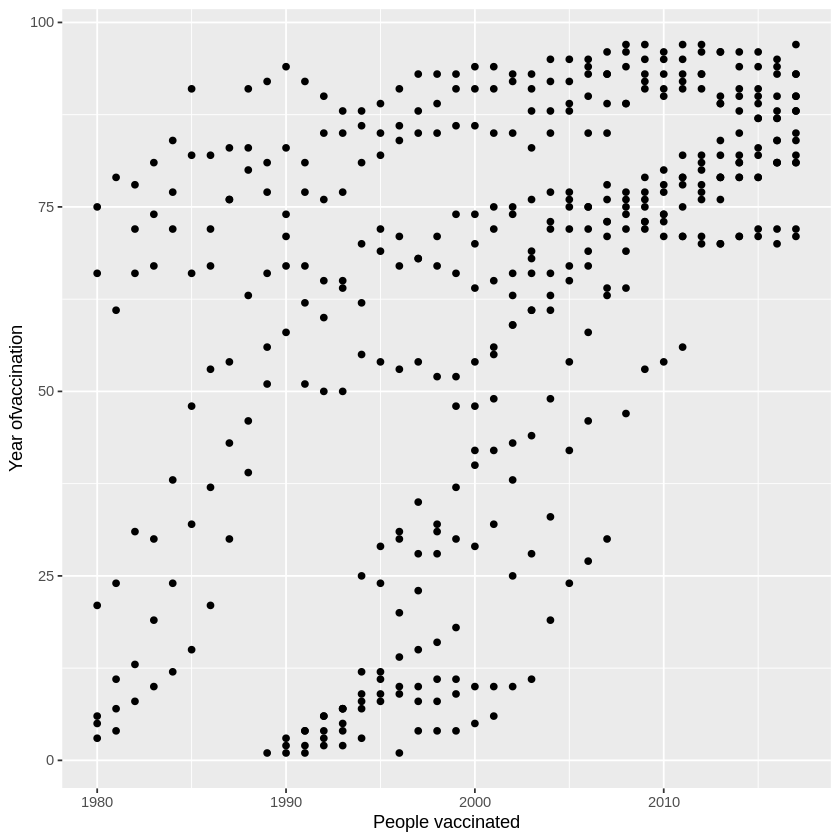

In [34]:
 world_vacc_plot <- world_vaccination |>
     ggplot(aes(x = yr, y = pct_vaccinated)) +
         geom_point() + 
         xlab("People vaccinated") +
         ylab("Year ofvaccination") 
world_vacc_plot

In [35]:
test_1.2()

Test passed 🎉
Test passed 🌈
Test passed 🎊
Test passed 🎊
Test passed 🥳
[1] "Success!"


You will probably find that this plot isn't the right size for your screen. Let's change the plot size so that the plot area is as big as it needs to be to clearly see the "ink" (dots). We do this using the `options` function from the `repr` R package. In past worksheets and tutorials we did this for you, from now on you need to do this yourself and choose an approprate plot size.

The `options` function takes 2 arguments for plot size, `repr.plot.width` and `repr.plot.height`. Uncomment the first line of code in the code cell below and fill in the `...`  to choose a more approprate size and and replot the figure afterwards below.

*Note: if you get a weird error saying `unable to start device 'png'`, it's because you set your plot's width and height too large - try a smaller number for each. If you get an error saying `invalid 'width' / 'height' argument`, it may be because you set the width/height too small - try a larger number.*

You'll also often need to change the font size in plots. For this, add `theme(text = element_text(size=....))` to your `ggplot` object, with a reasonable choice of font size (a decent starting point is `size = 20`).


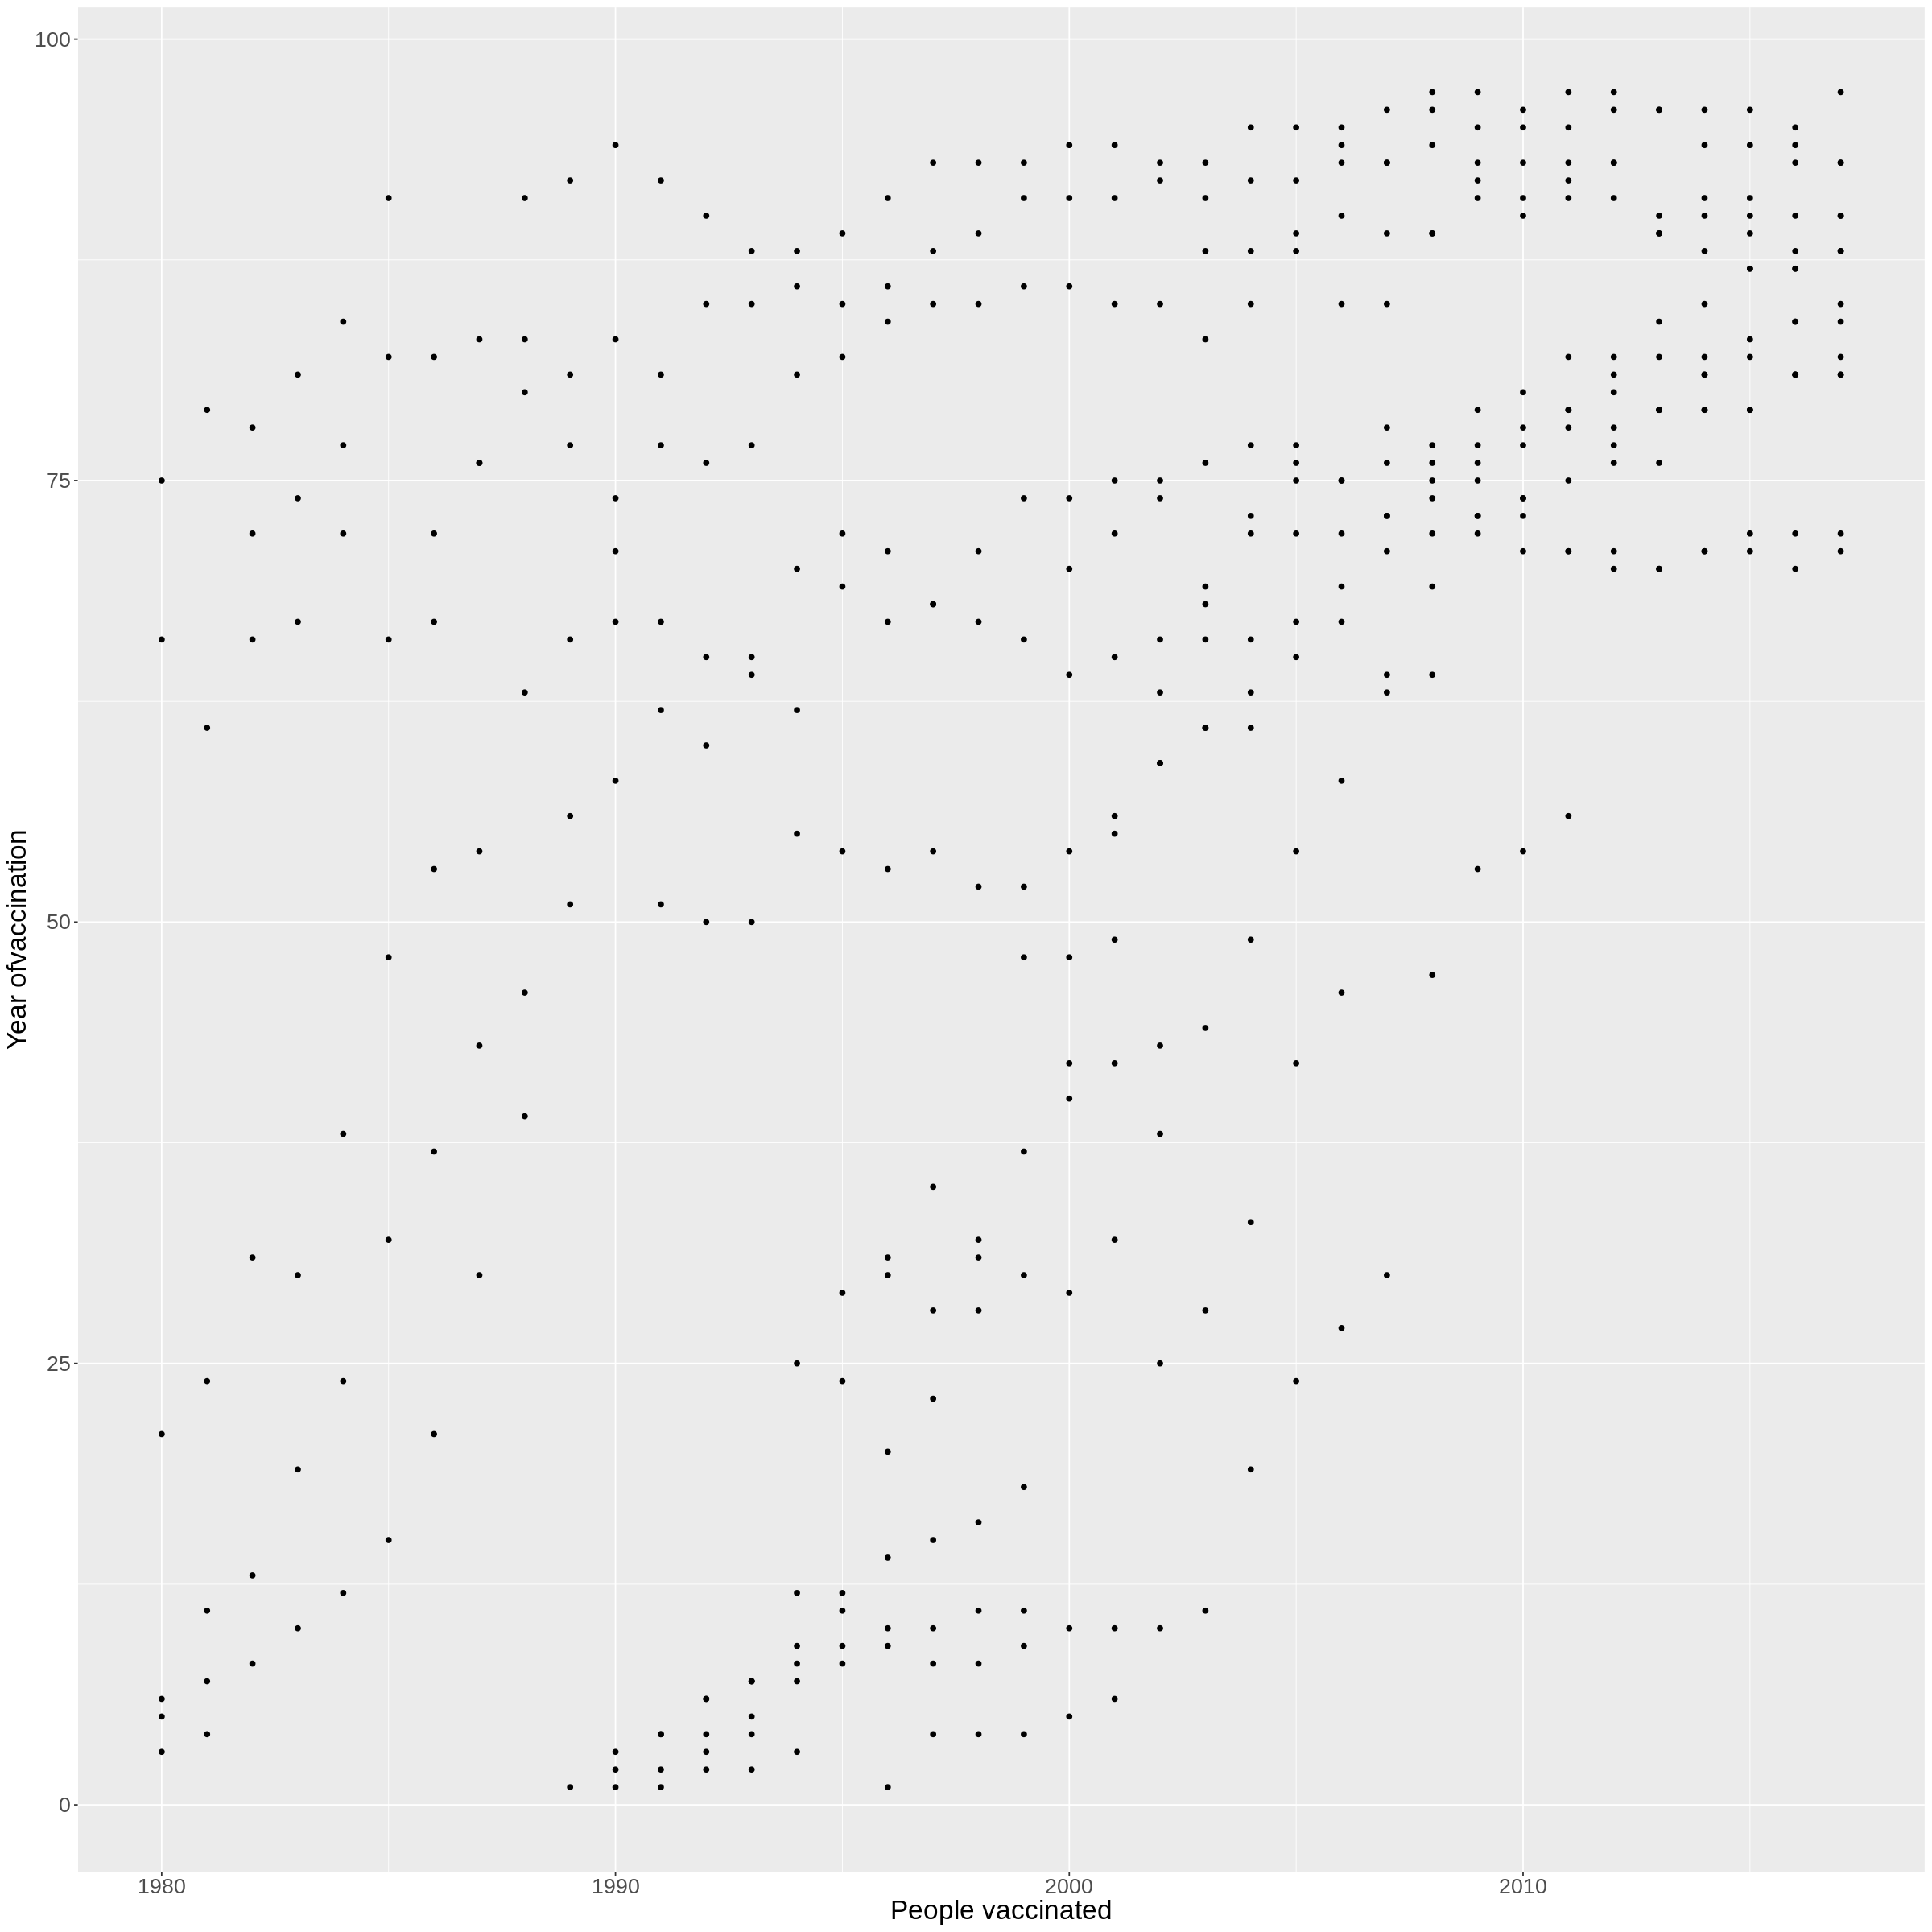

In [36]:
options(repr.plot.width = 20, repr.plot.height = 20) 
world_vacc_plot <- world_vacc_plot +
                        theme(text = element_text(size = 20))
world_vacc_plot

**Question 1.3** Multiple Choice:
<br> {points: 1}

Now that we see how the percentage of people vaccinated with each of these vaccines varies over time, we should now start to look if there is a difference between the percentage vaccinated between the two different diseases. What should we do next to compare the differences (if they exist) most effectively?

A. Filter the data by the type of vaccine and make two separate plots

B. Colour the data by the type of vaccine

C. Have a different shaped "dot"/point for each type of vaccine

D. Colour the data by the type of vaccine, and have a different shaped "dot"/point for each type of vaccine

*Assign your answer to an object called `answer1.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [37]:
answer1.3 <- "D" 

In [38]:
test_1.3()

Test passed 🥳
[1] "Success!"


**Question 1.4**
<br> {points: 1}

Now that we know how we will separate the data for our visualization, let's do it. Start by copying your code from **Question 1.2**.

Next, add an `aes` function inside of the `geom_point` function to map `vaccine` to colour and shape. So your `geom_point` function and layer should look something like this: 

```
geom_point(aes(colour = ..., shape = ...))  +
```

Finally, make sure you change *all* the axes and legends so they have nicely formatted, human-readable labels. To do this, we will remove the `xlab` and `ylab` label functions and just use the more general `labs` function, specifying all the aesthetics we want to label:

```
labs(x = "...", y = "...", colour = "...", shape = "...")
```

*Assign your answer to an object called `compare_vacc_plot`.*

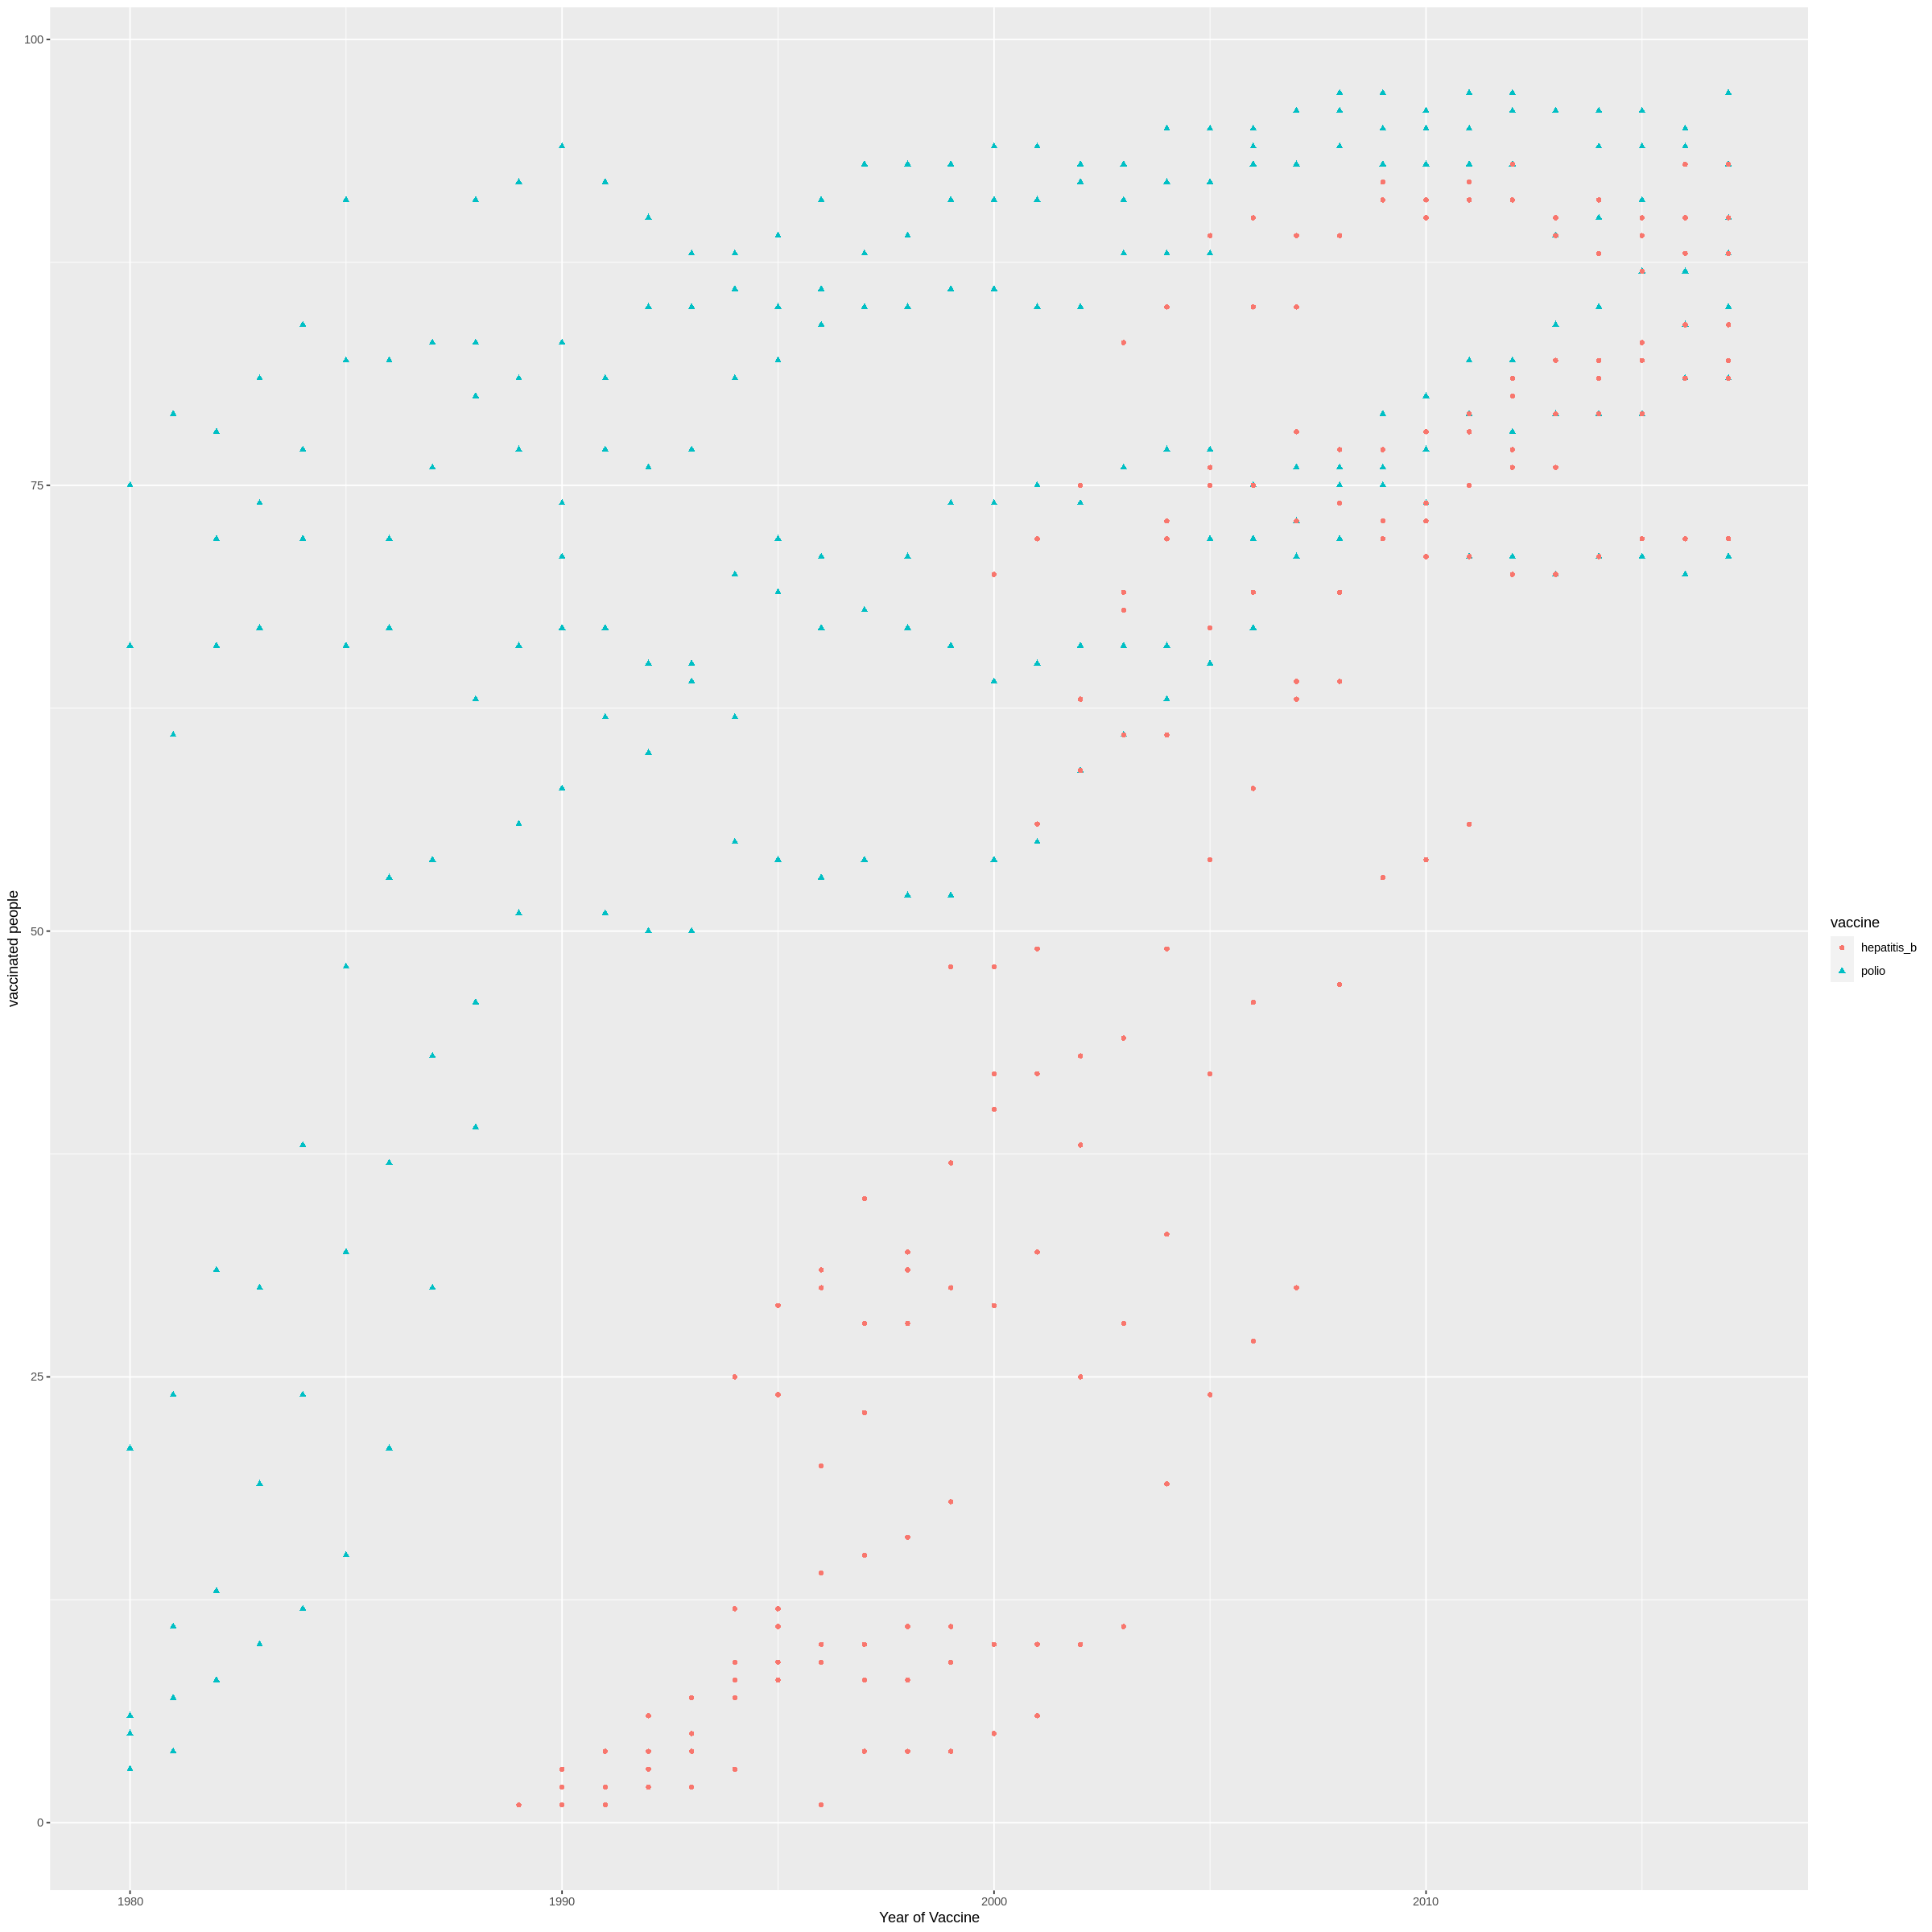

In [43]:
compare_vacc_plot <- world_vaccination |>
      ggplot(aes(x = yr, y = pct_vaccinated)) +
     geom_point(aes(colour = vaccine, shape = vaccine))  +
     labs(x = "Year of Vaccine", y = "vaccinated people", colour = "vaccine", shape = "vaccine")
compare_vacc_plot

In [44]:
test_1.4()

Test passed 😀
Test passed 😸
Test passed 😸
Test passed 🌈
Test passed 🎊
Test passed 🥳
Test passed 🥳
Test passed 🥇
Test passed 🌈
[1] "Success!"


Now we see that although the dates where the percentage vaccinated became > 0 for each vaccine type started out in different years, they both increased at similar rates and are currently resting at about the same amount of percentage vaccinated. There is some variation that still exists in the data however, and perhaps that could be attributed to region? Let's create some more visualizations to see if that is indeed the case!

To get started, let's focus on the Polio vaccine data, and then we'll look at both together.

**Question 1.5**
<br> {points: 1}

Create a data frame object named `polio` that contains only the rows where the `vaccine` is `"polio"`:

In [163]:
polio <- filter (world_vaccination,vaccine == "polio")
polio

who_region,yr,pct_vaccinated,vaccine
<chr>,<dbl>,<dbl>,<chr>
Africa,2017,71,polio
Americas,2017,90,polio
South-East Asia,2017,88,polio
⋮,⋮,⋮,⋮
Europe,1980,75,polio
Eastern Mediterranean,1980,21,polio
Western Pacific,1980,5,polio


In [164]:
test_1.5()

Test passed 🌈
Test passed 🎊
Test passed 🎉
Test passed 🥳
[1] "Success!"


**Question 1.6**
<br> {points: 1}

Now create a scatter plot using the `polio` data where percentage vaccinated is on the y-axis, year is on the x-axis and each group has a different coloured point, and a different shape. Name it `polio_regions`. You might want to use `options` to change the plot size if the size of the last few plots isn't ideal for this plot.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 38 rows containing missing values (geom_point).”


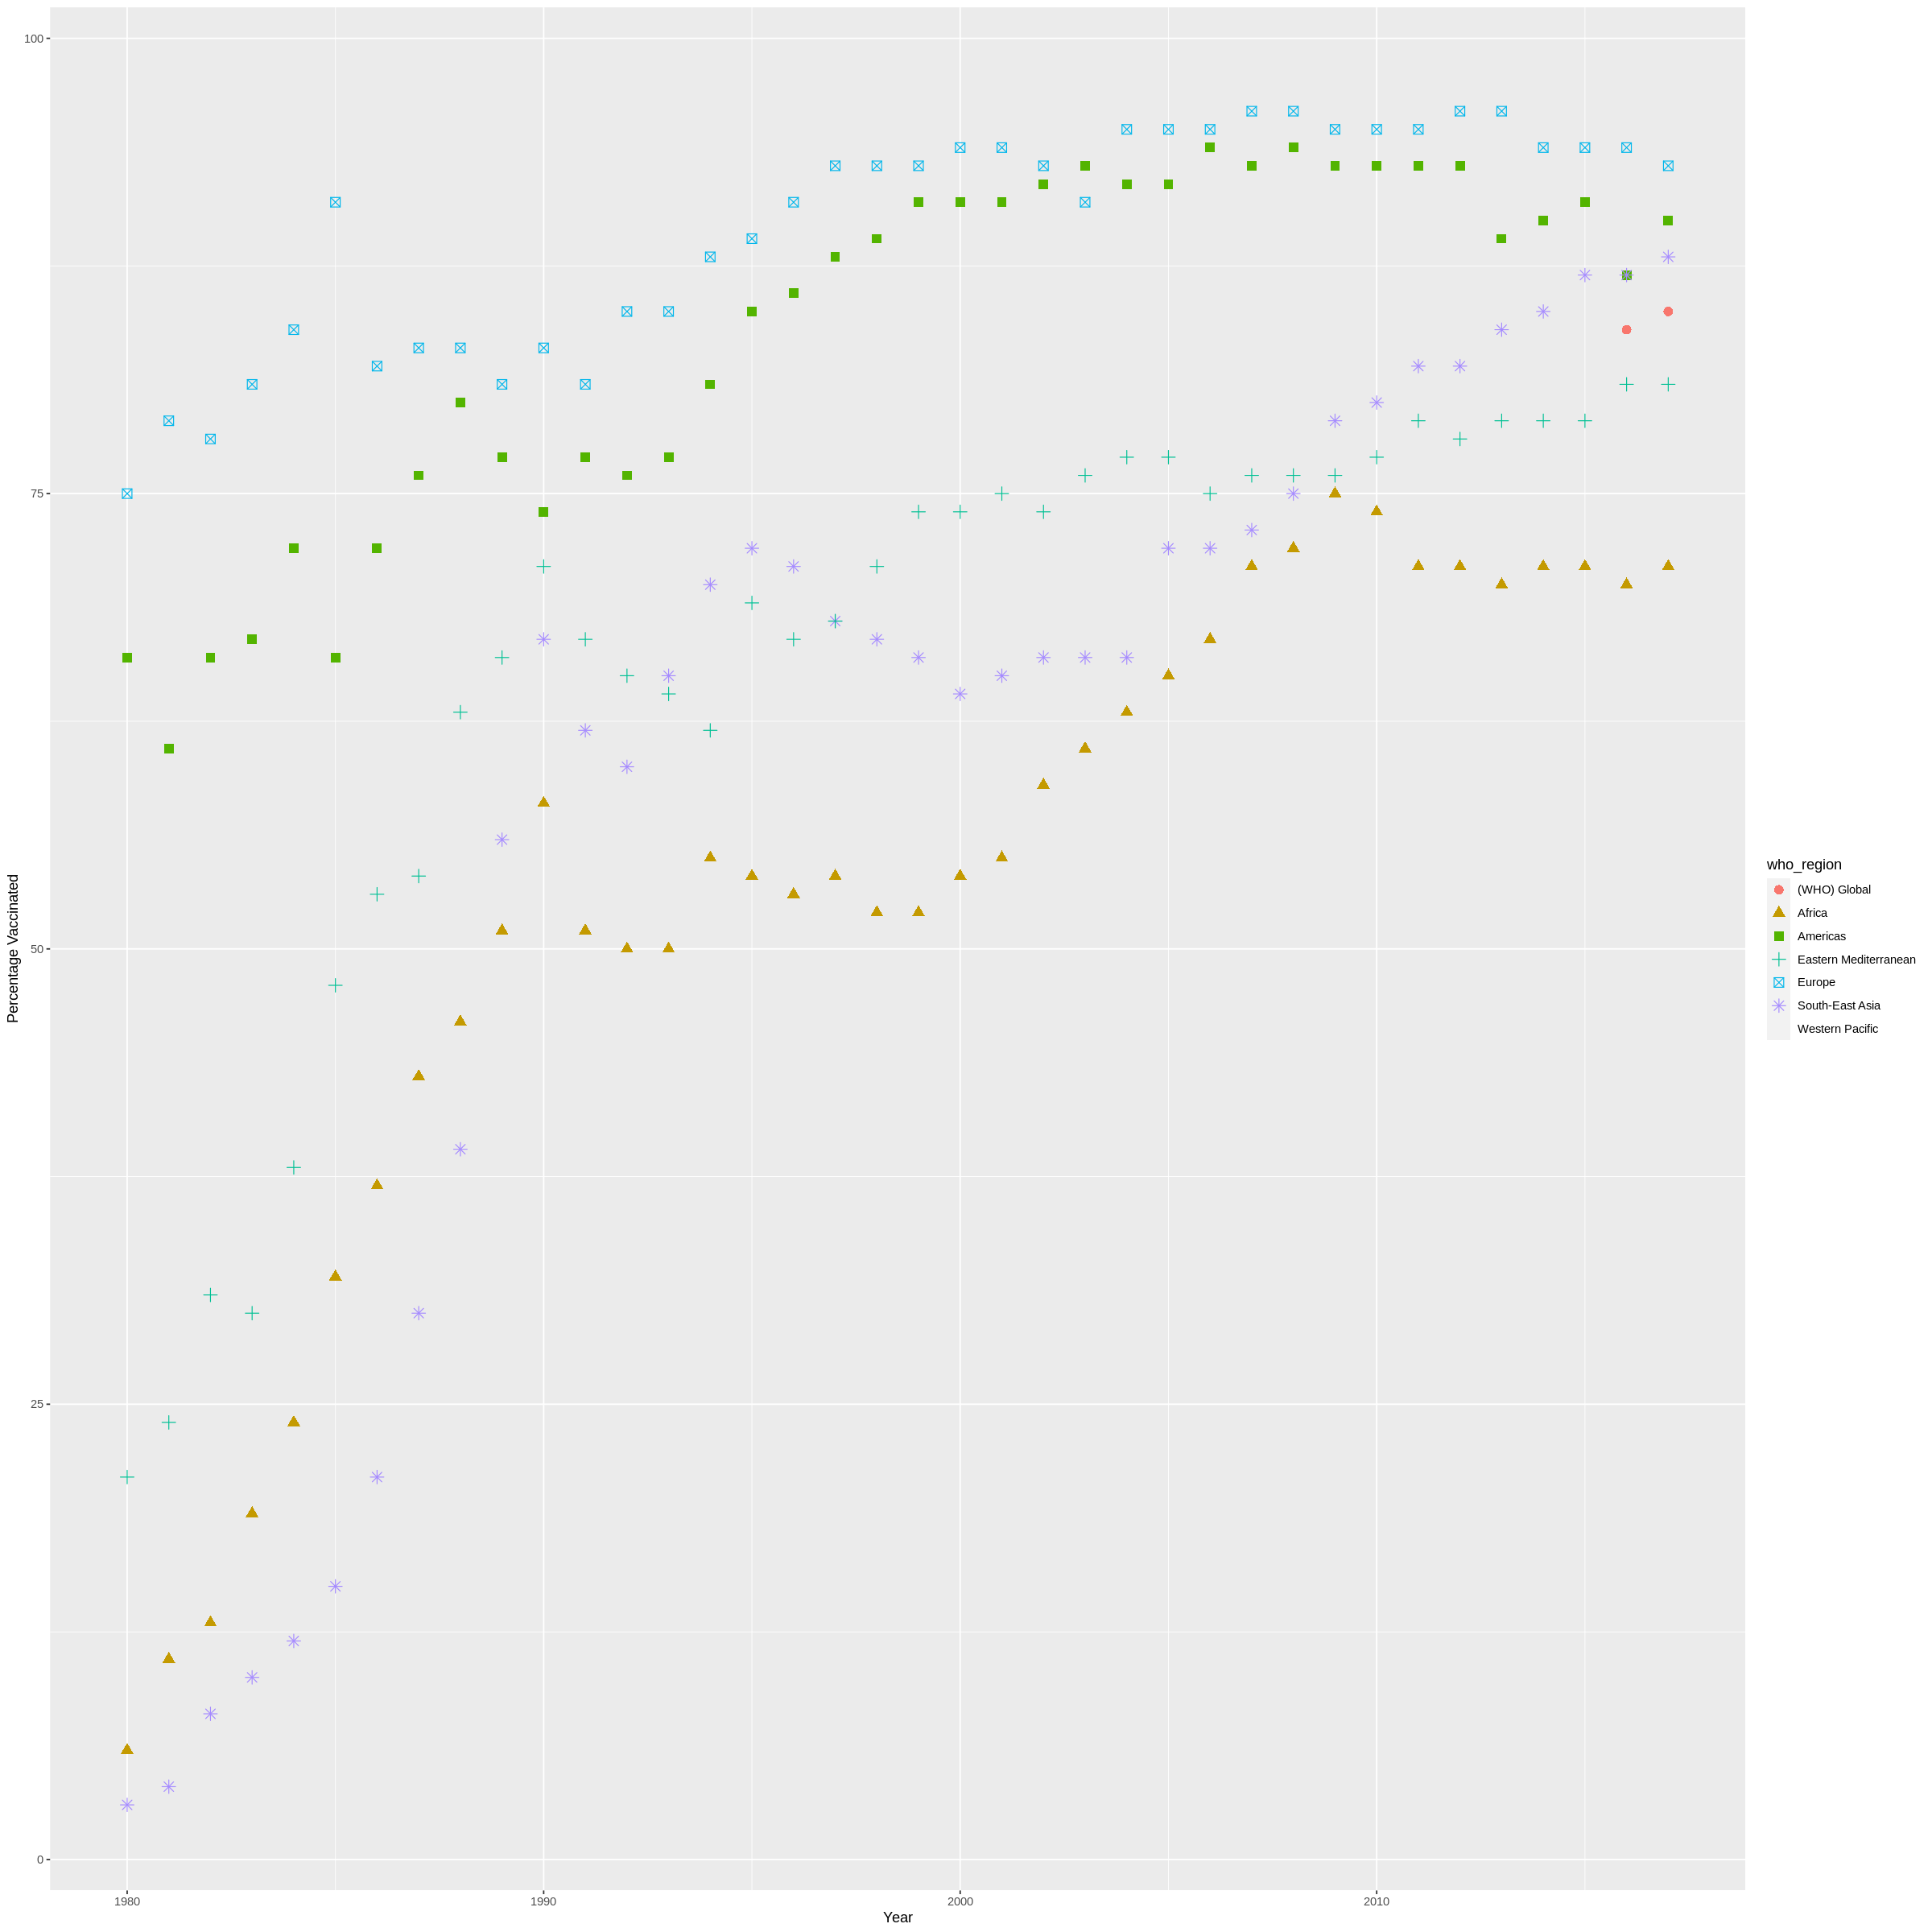

In [53]:
polio_regions <- ggplot(polio, aes(x=yr, y=pct_vaccinated, color=who_region, shape=who_region)) +
  geom_point(size=3) +
  xlab("Year") +
  ylab("Percentage Vaccinated") +
  theme(plot.title = element_text(hjust = 0.5))

polio_regions

In [54]:
test_1.6()

Test passed 😸
Test passed 😀
Test passed 🥳
Test passed 🌈
Test passed 🥇
Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 1.7.1**
<br> {points: 1}

Although changing point colour and shape makes it easier for us to see the differences between multiple groups, at some point there are just too many groups to keep things straight. We are approaching this limit in the plot above, so we need to do something different... One thing we could try is to change the point to a line to reduce the noise/chaos of the plot above. We would also not have a shape. Do that in the cell below and name the plot object `polio_regions_line`.

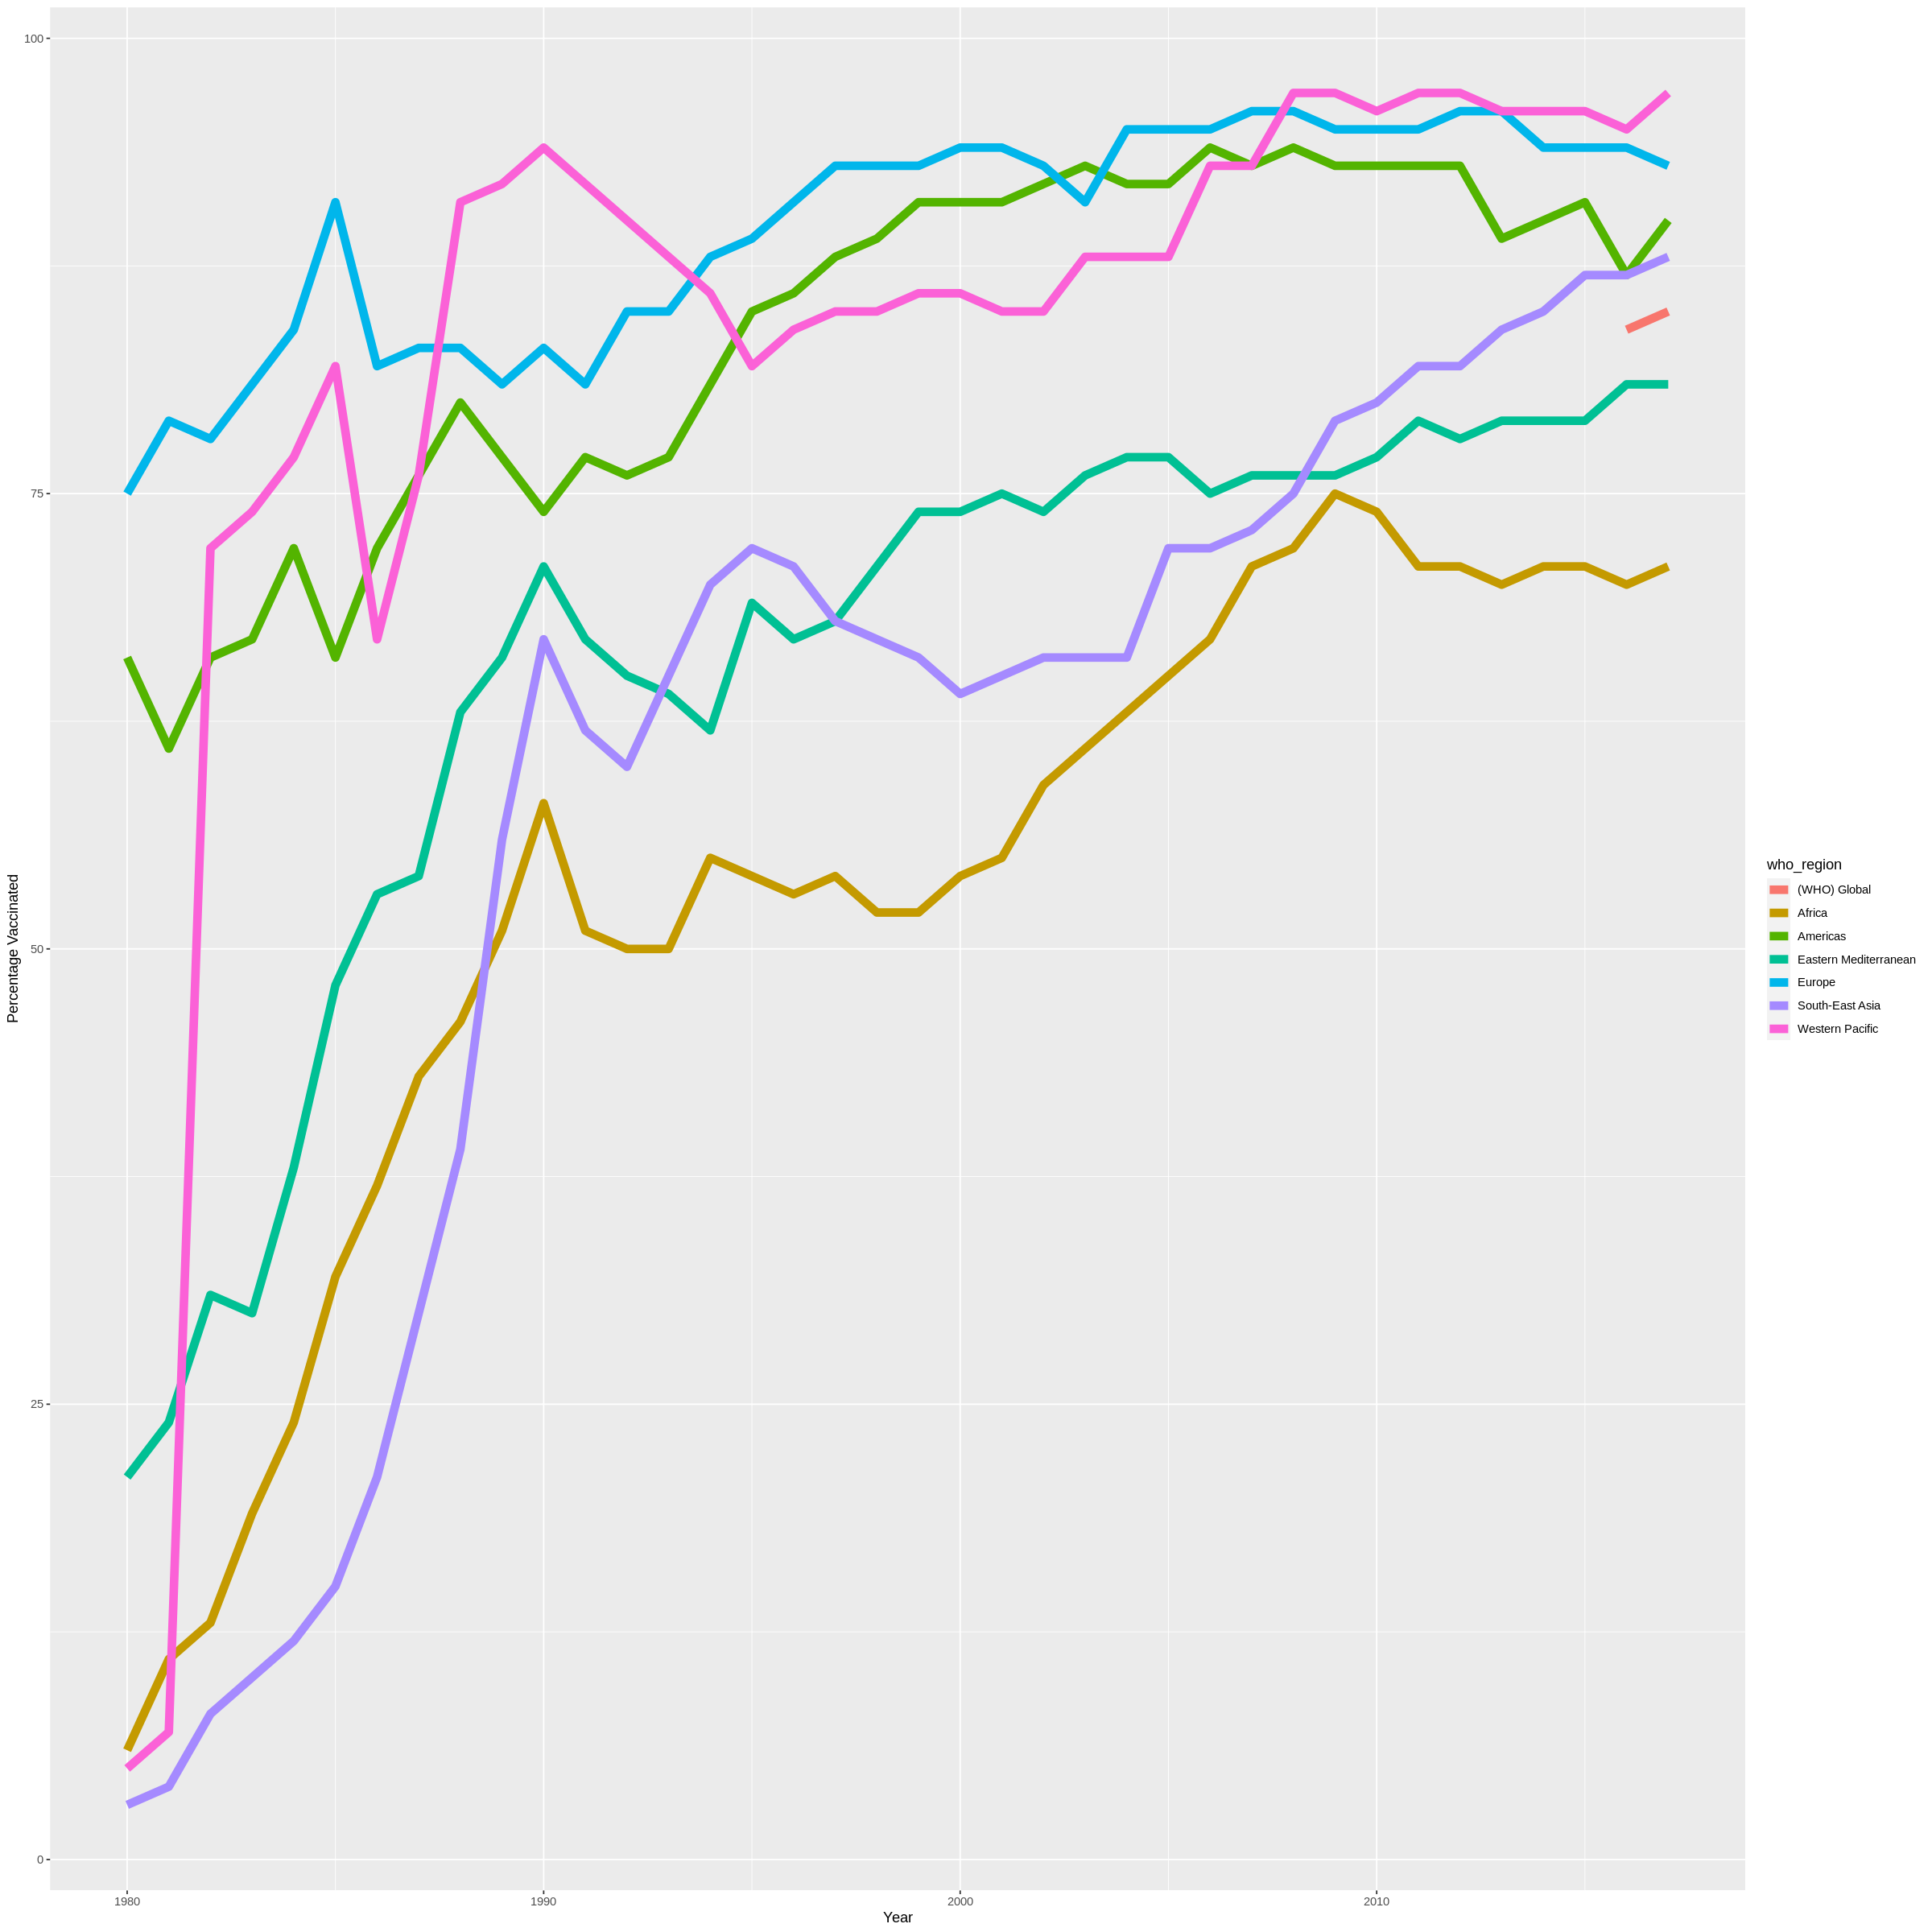

In [55]:
polio_regions_line <- ggplot(polio, aes(x=yr, y=pct_vaccinated, color=who_region)) +
  geom_line(size=3) +
  xlab("Year") +
  ylab("Percentage Vaccinated") +
  theme(plot.title = element_text(hjust = 0.5))

polio_regions_line

In [56]:
test_1.7.1()

Test passed 🌈
Test passed 🥇
Test passed 🎉
Test passed 🎉
Test passed 🎊
Test passed 🎉
Test passed 🎊
[1] "Success!"


**Question 1.7.2**
<br> {points: 1}

One thing that is still not ideal with the visualization above is the legend title is not very readable. Let's add another layer to `polio_regions_line` to do that. To do this we use the `labs` function and choose the aesthetic mapping (here `color`) that we want to apply the legend title to. Also, given that we created an object from our previous plot, we do not need to retype all our code, but instead can just say:

```
[your plot object] <- [your plot object] +
                        [new layer code]
```

*Assign your answer to an object called `polio_regions_line`*.

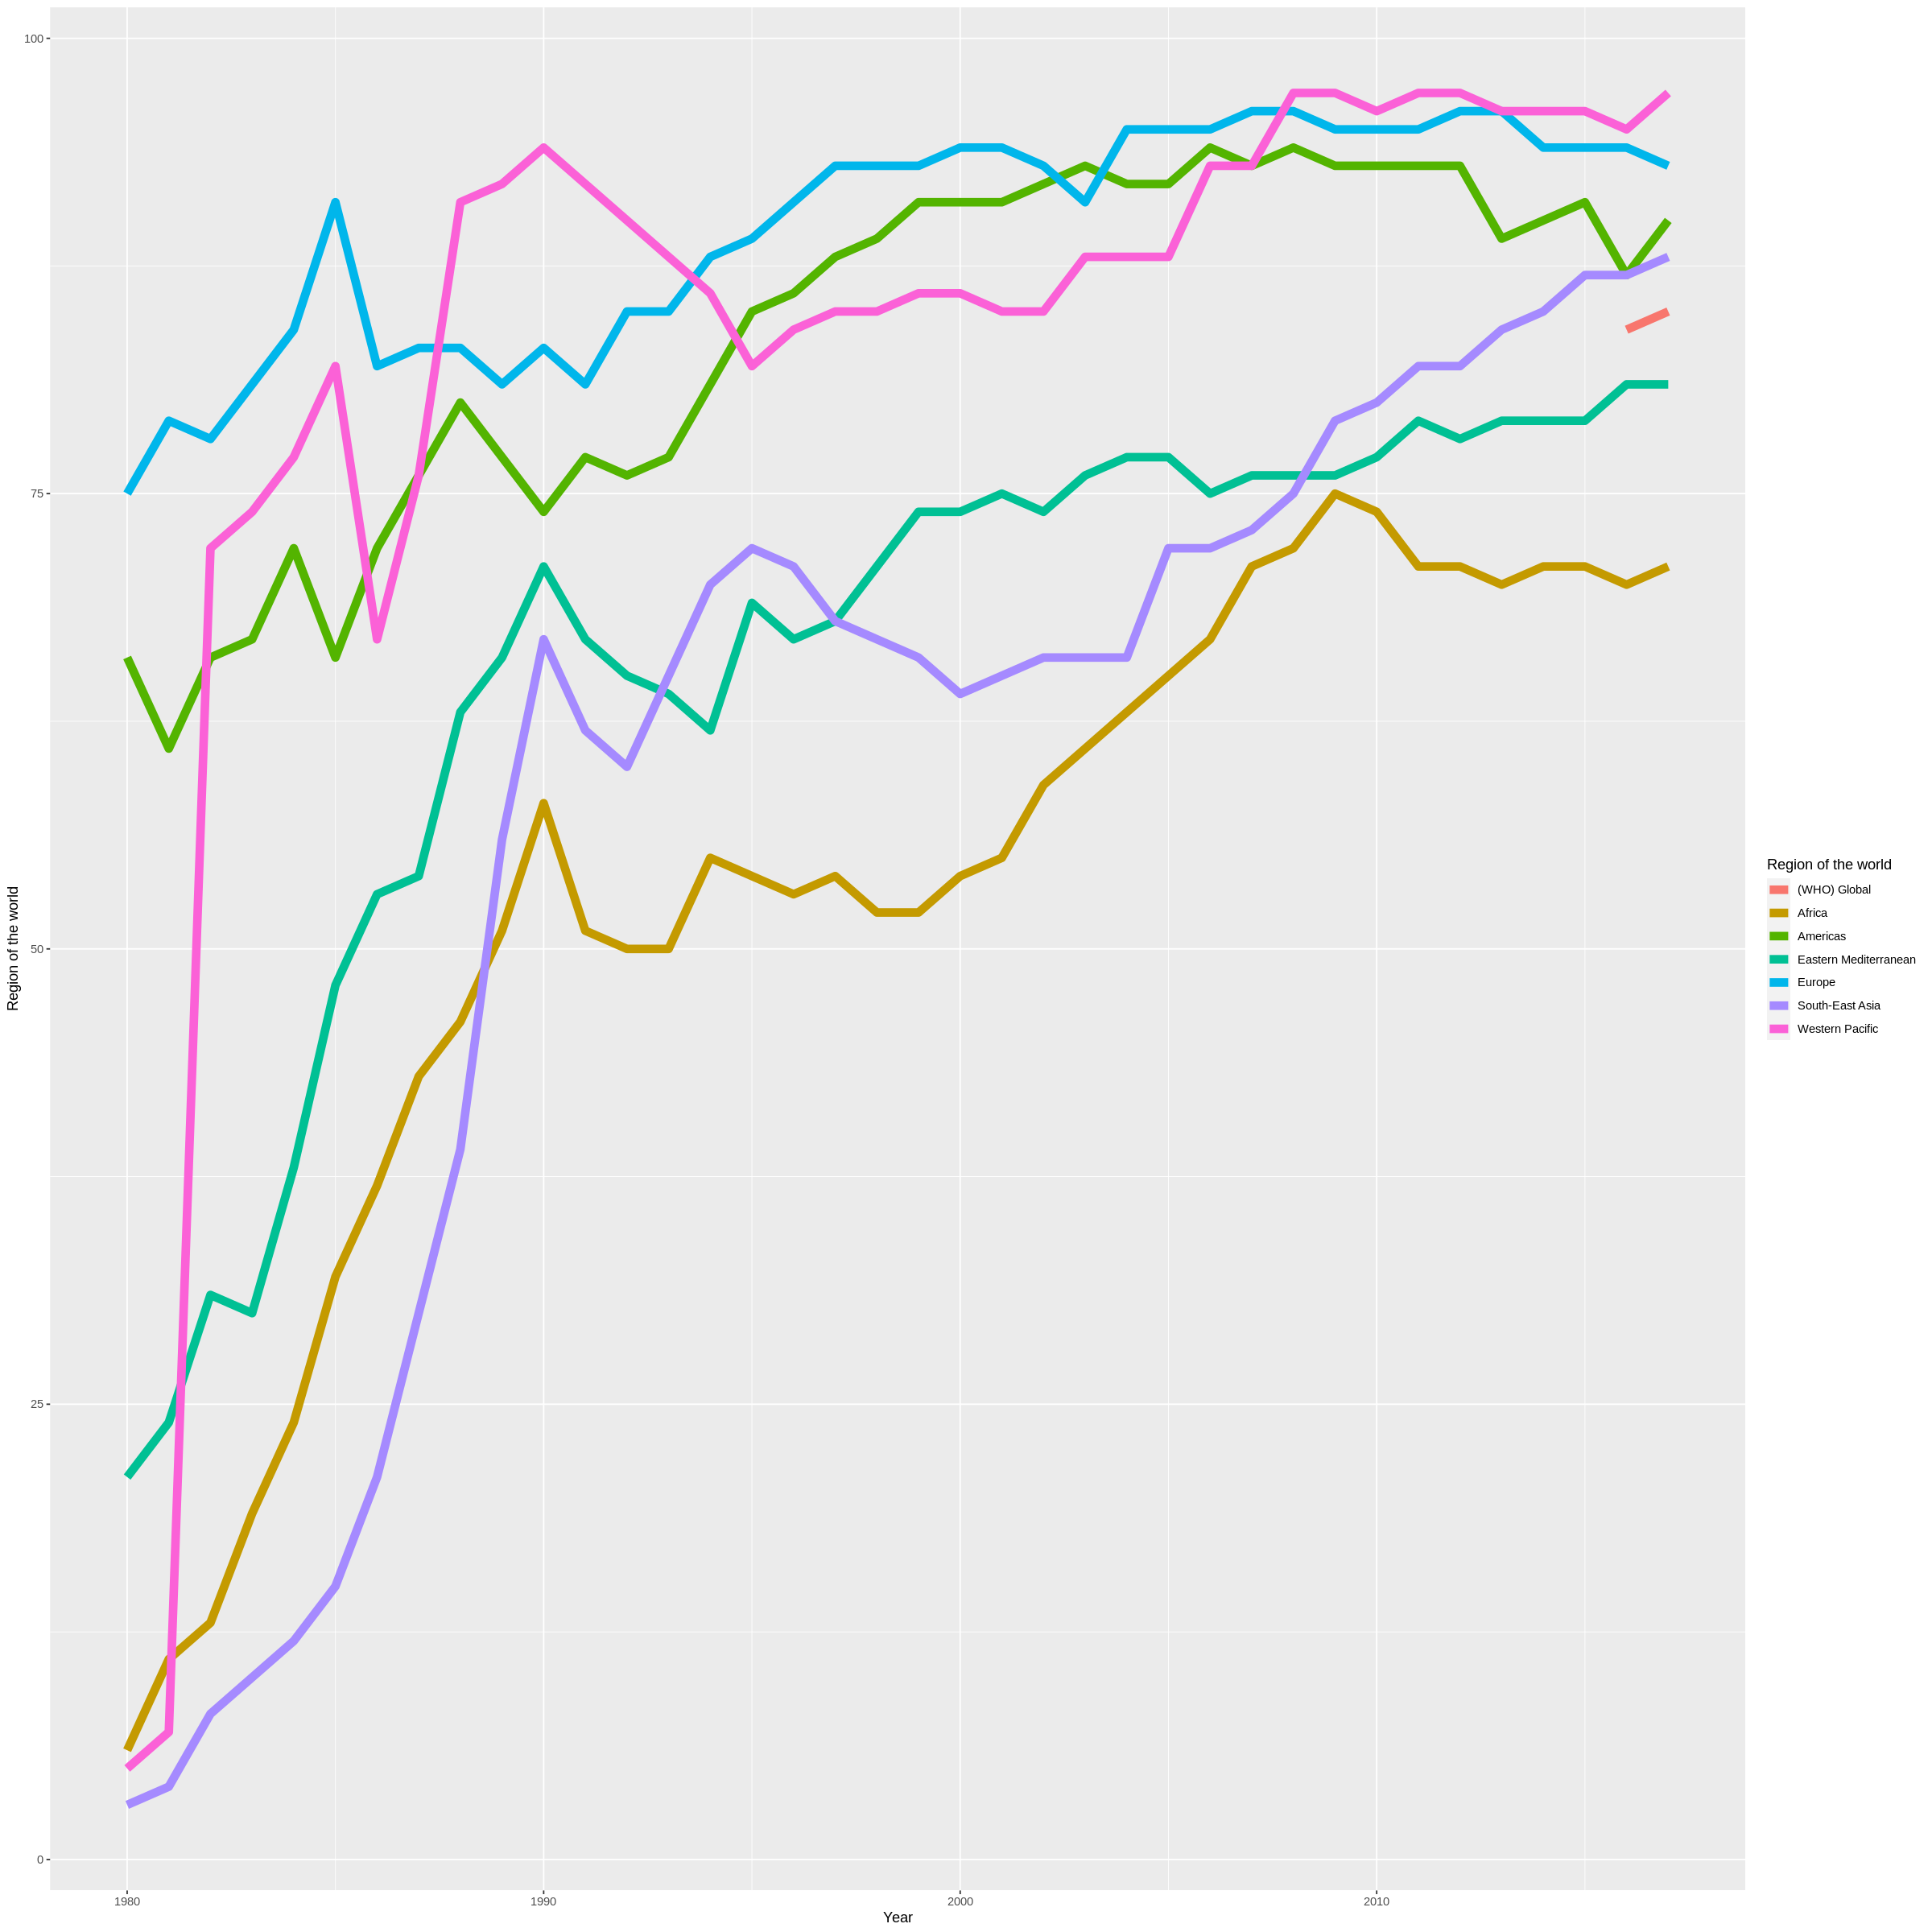

In [60]:
polio_regions_line <- polio_regions_line +
       labs(color = "Region of the world")

polio_regions_line

In [61]:
test_1.7.2()

Test passed 😀
Test passed 🥇
Test passed 🎉
Test passed 🌈
Test passed 😀
Test passed 😀
Test passed 😸
[1] "Success!"


**Question 1.8**
<br> {points: 1}

Now that we know how to effectively plot the percentage vaccinated against Polio over time for each region, how might we compare this to what we see for each region for the percentage vaccinated against Hepatitis B? In this case we would like two side-by-side or two vertically arranged plots. If that data are in the same data frame (as ours were in the `world_vaccination` data frame) then we can use a technique called facetting to do this. We saw facetting last week, and now we will take some time to learn it.

There are two facetting functions in R, the one we will see here is `facet_grid`. The basic syntax for this `ggplot` layer is the following:

```
# Stacks plots horizontally with one column per member of the category in COLUMN_X
facet_grid(cols = vars(COLUMN_X))
```

or 

```
# Stacks plots vertically with one row per member of the category in COLUMN_X
facet_grid(rows = vars(COLUMN_X))
```

Create a plot like the one named `polio_regions_line` but instead of using the `polio` data frame, use the `world_vaccination` data frame, and facet on the column `vaccine` so that the two plots are side-by-side. Name this plot object `side_by_side_world`. Make sure you set `options` to make the plot size fit well within the worksheet.

In [165]:
side_by_side_world <- world_vaccination |> ggplot(world_vaccination, aes(x = yr, y = pct_vaccinated)) + 
  geom_line() +   
  labs(x = "Year", y = "Percentage vaccinated", title = "World Vaccination Coverage by Vaccine", 
       caption = "Source: World Health Organization") + 
       facet_grid(cols = vars(vaccine))+
            theme(plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"))
side_by_side_world           

ERROR: [1m[33mError[39m in [1m[1m`ggplot()`:[22m
[33m![39m Mapping should be created with `aes()` or `aes_()`.


In [69]:
test_1.8()

ERROR: Error in test_1.8(): object 'side_by_side_world' not found


**Question 1.9.1**
<br> {points: 1}

Now use `facet_grid` to arrange the same two plots vertically. Name this plot `vertical_world`. Again, make sure you set `options` to create a suitable plot size.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
vertical_world

In [ ]:
test_1.9.1()

Which arrangement is better? Depends on what you are asking! If you are interested in comparing the rate at which things changed over time, then the vertical arrangement is more effective. However, if you are interested in comparing the exact percentage values between the lines at certain points then the side-by-side arrangement is more effective.

**Question 1.9.2** Multiple Choice:
<br> {points: 1}

Which WHO region had the greatest progress in the shortest period of time in either Hepatitis B and in Polio (using the data we plotted above)?


A. Americas

B. Eastern Mediterranean

C. Europe

D. Western Pacific

*Assign your answer to an object called `answer1.9.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [83]:
answer1.9.2 <- "D"

In [84]:
test_1.9.2()

Test passed 🎉
[1] "Success!"


## 2. Fast-Food Chains in the United States

With their cheap meals and convenient drive-thrus, fast food restaurants are a growing demand in many countries. Despite their questionable ingredients and nutritional value, most Americans count on fast food in their daily lives (they are often delicious and so hard to resist...). 

<img src="https://media.giphy.com/media/NS6SKs3Lt8cPHhe0es/giphy.gif" width = "400"/>

Source: https://media.giphy.com/media/NS6SKs3Lt8cPHhe0es/giphy.gif

According to Wikipedia,
>  Fast food was originally created as a commercial strategy to accommodate the larger numbers of busy commuters, travelers and wage workers who often didn't have the time to sit down at a public house or diner and wait the normal way for their food to be cooked. By making speed of service the priority, this ensured that customers with strictly limited time (a commuter stopping to procure dinner to bring home to their family, for example, or an hourly laborer on a short lunch break) were not inconvenienced by waiting for their food to be cooked on-the-spot (as is expected from a traditional "sit down" restaurant). For those with no time to spare, fast food became a multi-billion dollar industry.

Currently, fast food is the norm and lots of businesses are investing in advertisement as well as new ideas to make their chain stand out in the sea of restaurants. In fact, one business is hiring you. They want to know the layout of the landscape:

1) Which is the most prevalent franchise on the west coast of the US? 

2) Which state has the highest number of fast-food restuarants? 

3) Is the most dominant franchise consistent across the west coast?

In this assignment, you will pretend to assist in the opening of a new restaurant somewhere on the west coast of the United States (California, Oregon, or Washington). Your goal is to figure out which chain to recommend and figure out which state would be the least competitive.

The columns in the dataset are:

- `name` - The name of the restaurant
- `st` - State

**Question 2.1** Multiple Choice:
<br> {points: 1}

From the list below, what are you *not* trying to determine:

A. The west coast frachise with the greatest prevalence

B. The least dominant franchise consistent across the west coast

C. The state on the west coast with the greatest number of fast-food restuarants

*Assign your answer to an object called `answer 2.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [85]:
answer2.1 <- "B"

In [86]:
test_2.1()

Test passed 🥳
[1] "Success!"


**Question 2.2**
<br> {points: 1}

Read the `fast_food.csv` file (found in the `worksheet_04/data` directory) and assign it to an object called `fast_food`.

In [87]:
fast_food <- read_csv ("data/fast_food.csv")
fast_food

Rows: 10000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, st

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,st
<chr>,<chr>
McDonald's,NY
Wendy's,OH
Frisch's Big Boy,KY
⋮,⋮
Five Guys,CO
El Pollo Loco,CA
Carl's Jr.,CA


In [88]:
test_2.2()

Test passed 😸
Test passed 🥇
Test passed 😸
[1] "Success!"


**Question 2.2.1** Multiple Choice:
<br> {points: 1}

What does each row in the dataset represent?

A. The number of branches from a given franchise and state

B. A unique branch of a given franchise in a given state

C. An indicator of whether a given franchise is present in a given state

*Assign your answer to an object called `answer 2.2.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [92]:
answer2.2.1 <- "B"

In [93]:
test_2.2.1()

Test passed 🥇
[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Next, find the top 9 restaurants (in terms of number of locations) on the west coast (in the states "CA", "WA" or "OR") and name them `top_restaurants`. Fill in the `...` in the cell below, removing the `fail()`. Recall that the `n()` function counts rows.

*Assign your answer to an object called `top_restaurants`.*

In [96]:
top_restaurants <- fast_food |>
    filter(st %in% c("CA", "WA", "OR")) |> 
    group_by(name) |>
    summarize(count = n()) |>
    arrange(desc(count)) |> 
    head(n = 9)
top_restaurants

name,count
<chr>,<int>
McDonald's,183
Taco Bell,102
Burger King,101
⋮,⋮
KFC,40
Subway,40
Del Taco,29


In [97]:
test_2.3()

Test passed 🎉
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Question 2.4** 
<br> {points: 1}

Even though we can use the table above to answer the question: "1) Which is the most prevalent franchise on the west coast of the US?" A table is not always the clearest way of showing information (although sometimes it might be). In our case a bar plot could be more helpful, so let's create one!

Plot the counts for the top 9 fast food restaurants on the west coast as a bar chart using `geom_bar`. The number of restaurants should be on the y-axis and the restaurant names should be on the x-axis. Because we are not counting up the number of rows in our data frame, but instead are plotting the actual values in the `count` column, we need to use the `stat = "identity"` argument inside `geom_bar`.

To do this fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`. Make sure to label your axes and choose an appropriate figure size using `options`.

*Assign your answer to an object called `count_bar_chart`.*

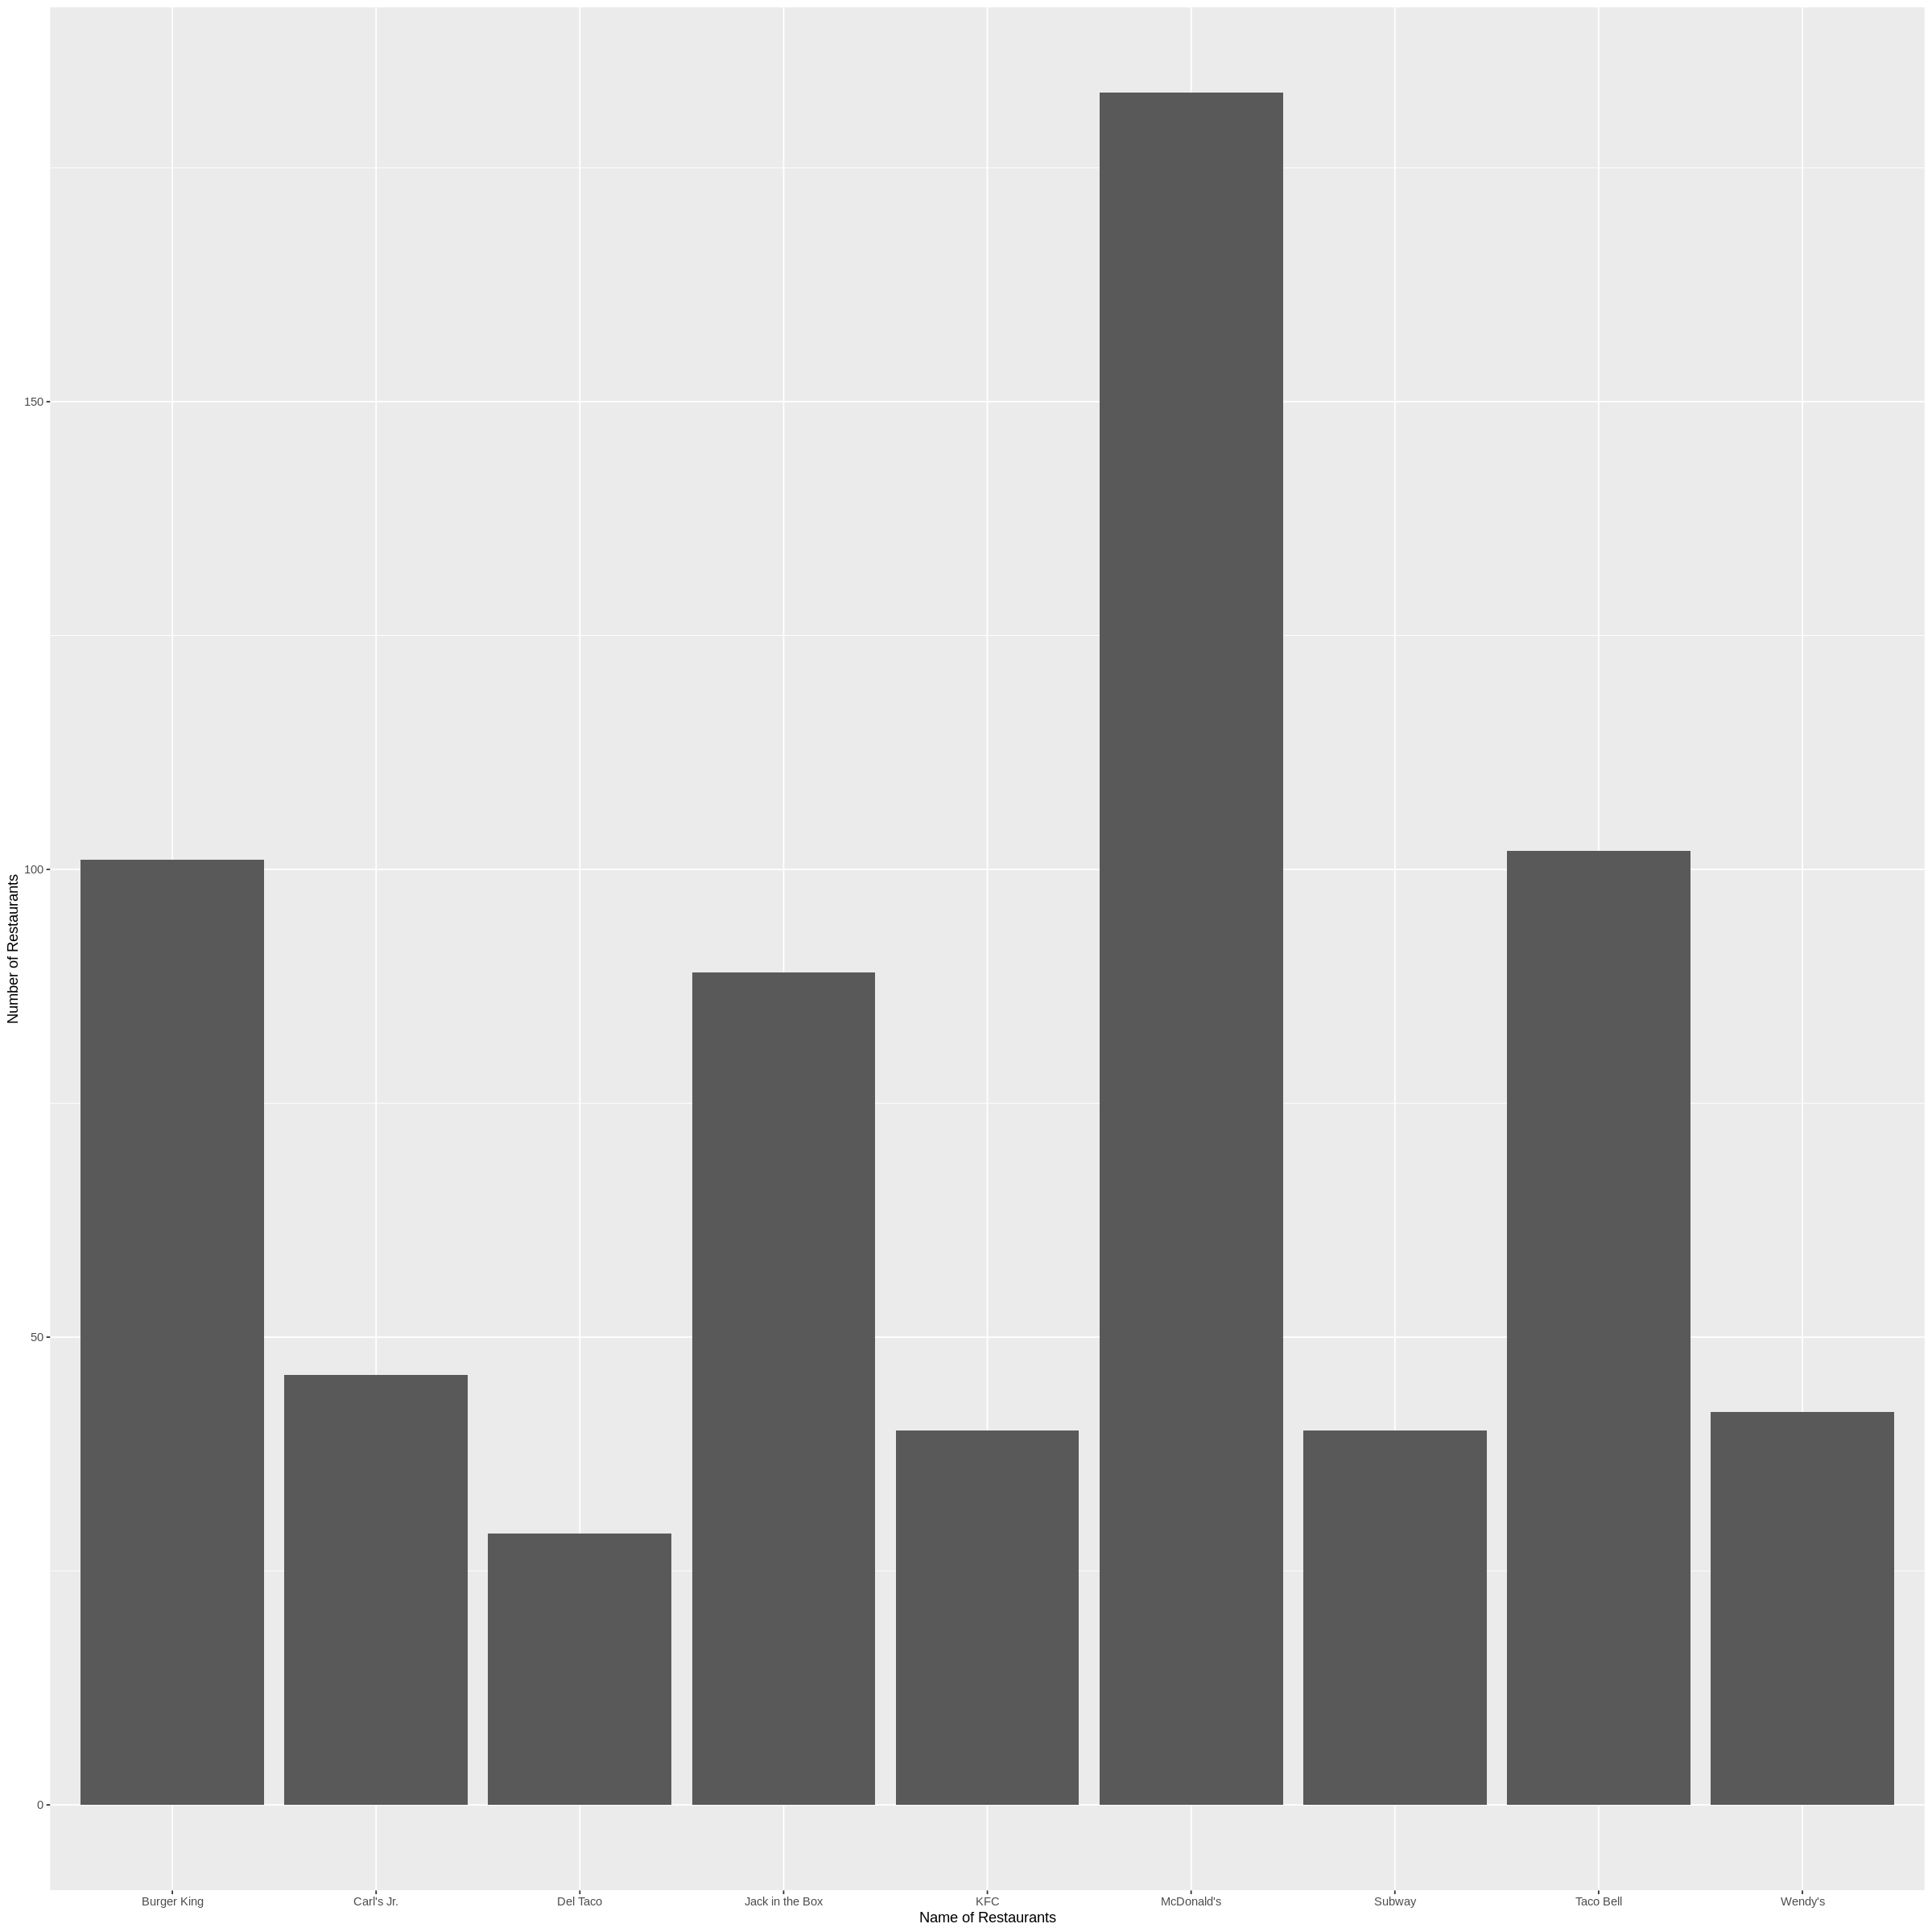

In [102]:
count_bar_chart <- ggplot(top_restaurants, aes(x = name, y = count)) + 
    geom_bar(stat = "identity") +
    xlab("Name of Restaurants") +
    ylab("Number of Restaurants")

count_bar_chart

In [103]:
test_2.4()

Test passed 🎊
Test passed 🎊
Test passed 😀
Test passed 🎉
Test passed 😸
[1] "Success!"


**Question 2.5**
<br> {points: 1}

The x-axes labels don't look great unless you make the bars on the bar plot above quite wide, wider than are actually useful or effective. What can we do? There are two good solutions to this problem.

**Part A:** We can add a `theme` layer and rotate the labels. Choose an angle that you think is appropriate. Choose something between 20 and 90 for the `angle` argument. Use the `hjust = 1` argument to ensure your labels don't sit on top of the bars as you rotate them (try removing that argument and see what happens...).

*Name the resulting plot count_bar_chart_A.*

**Part B:** We can also simply use horizontal bars. Use the `coord_flip` function to achieve this effect.

*Name the resulting plot count_bar_chart_B.*


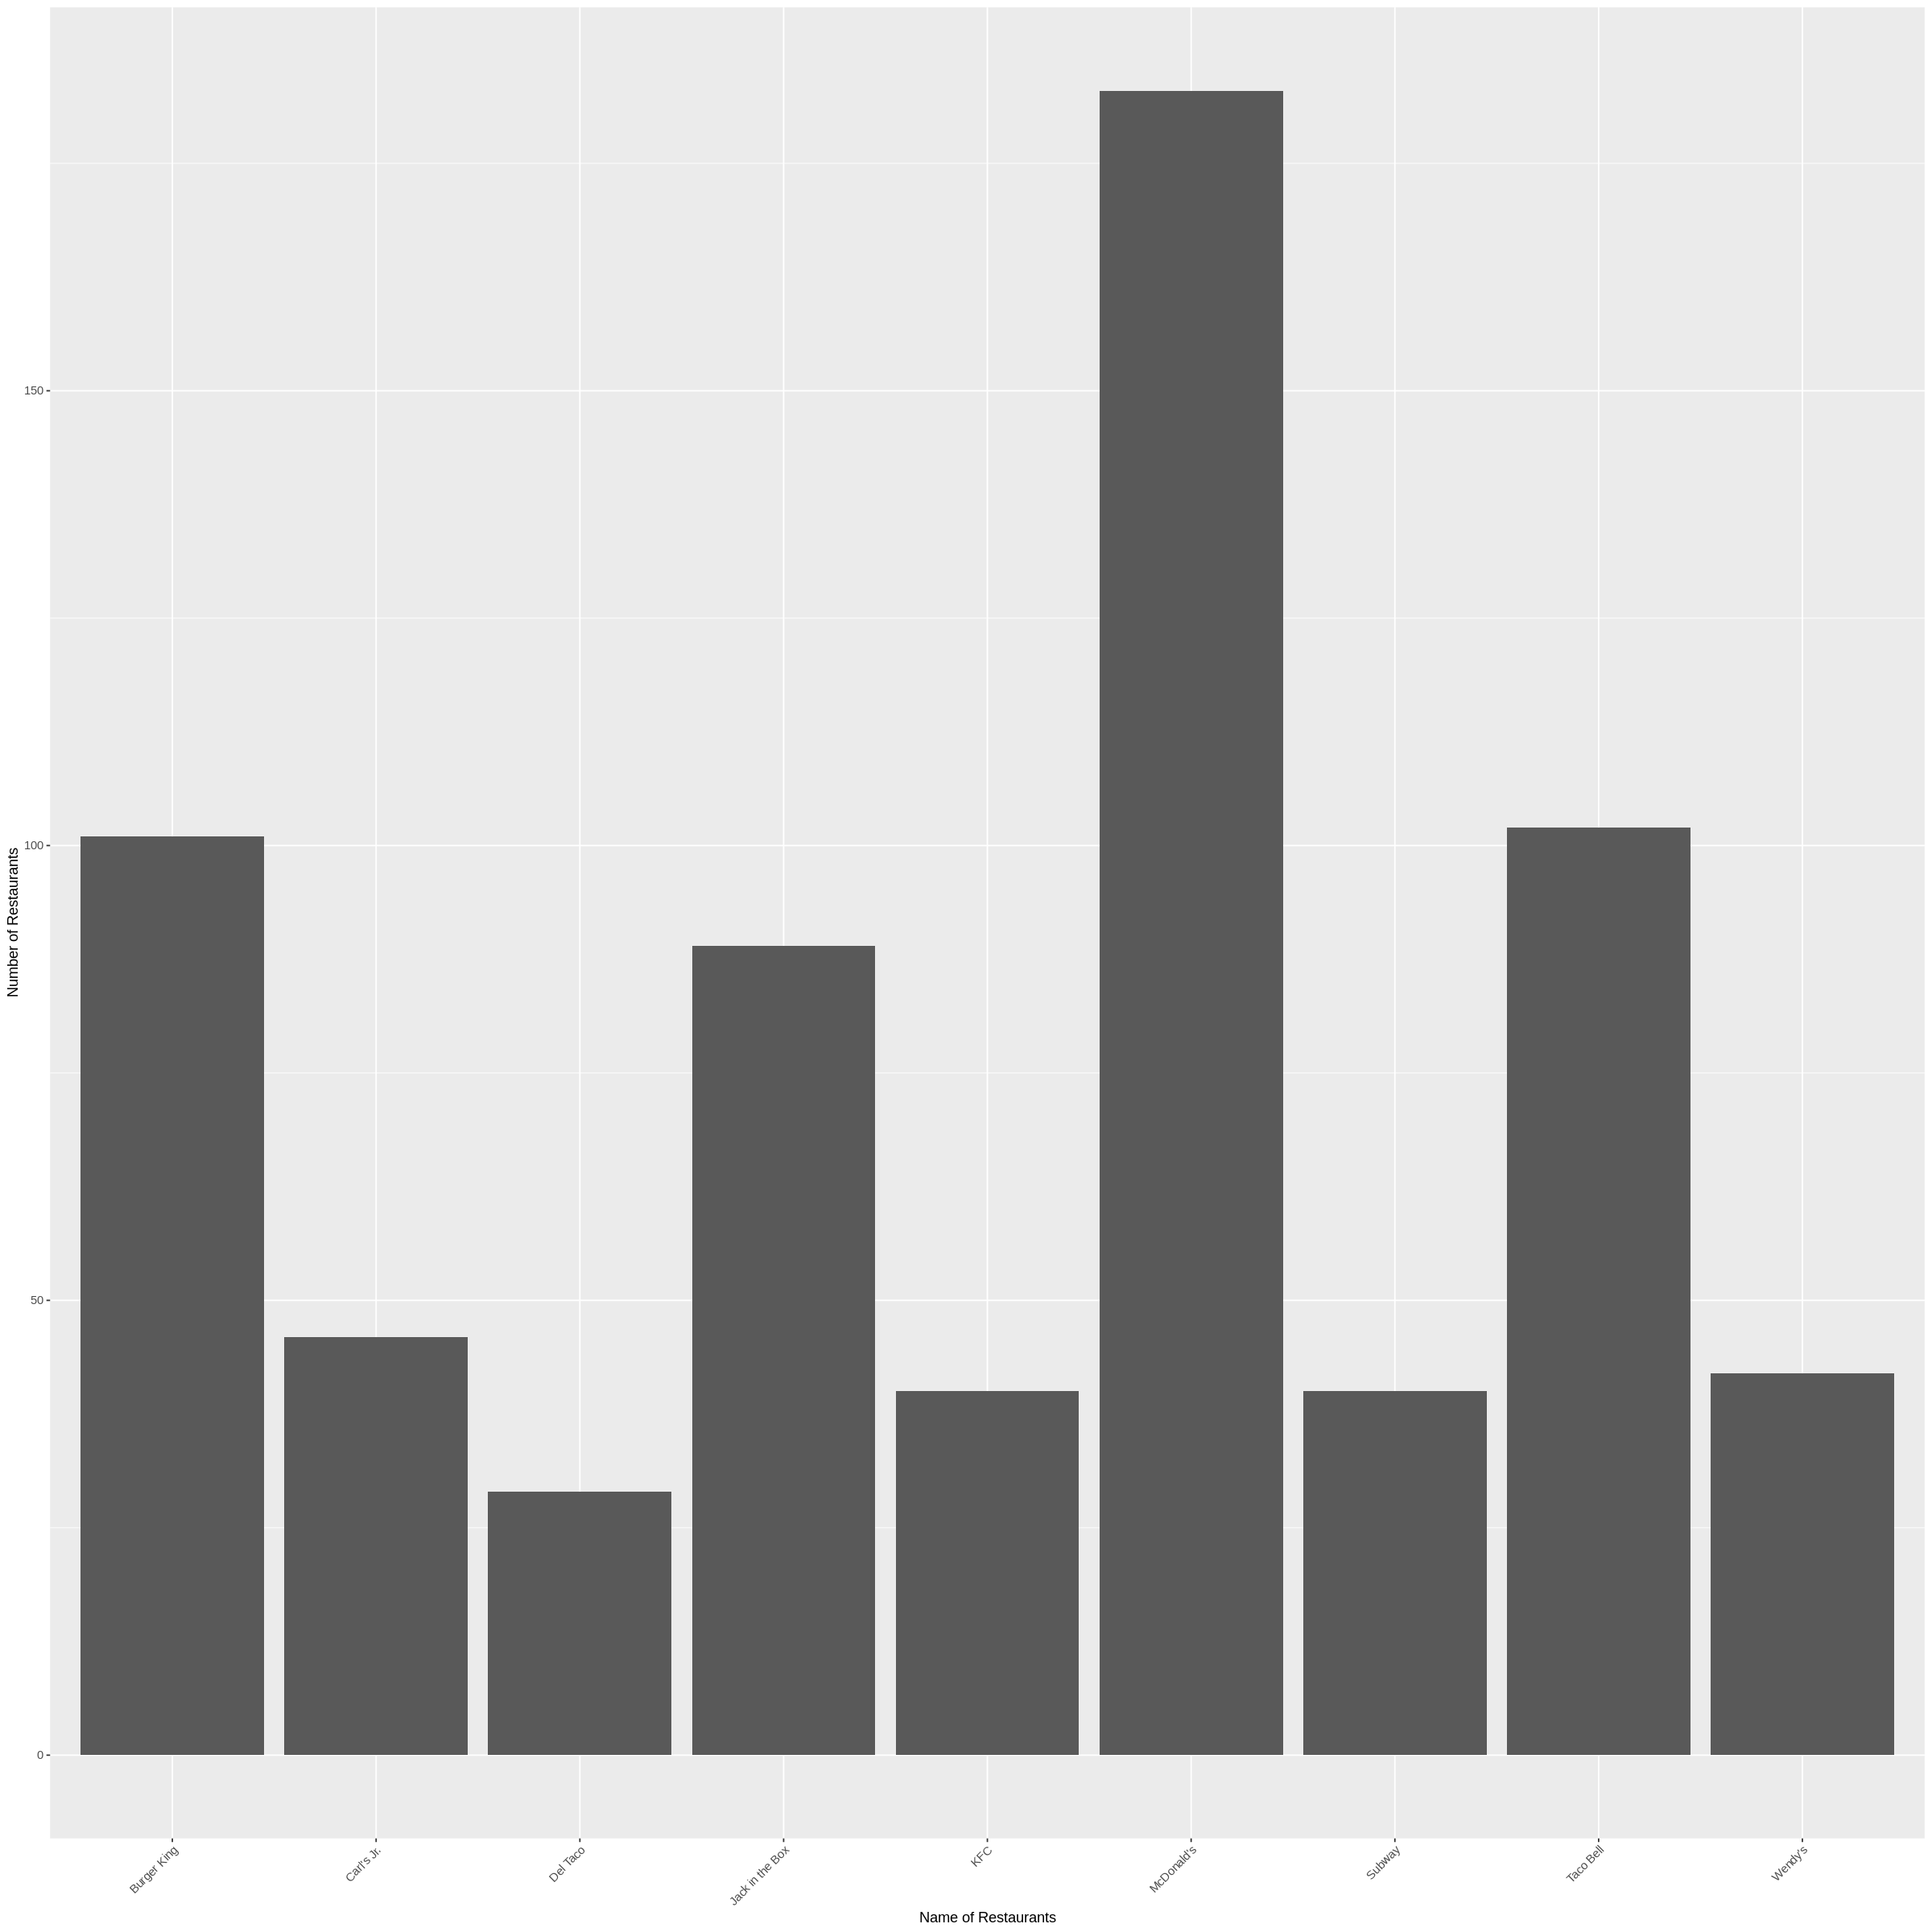

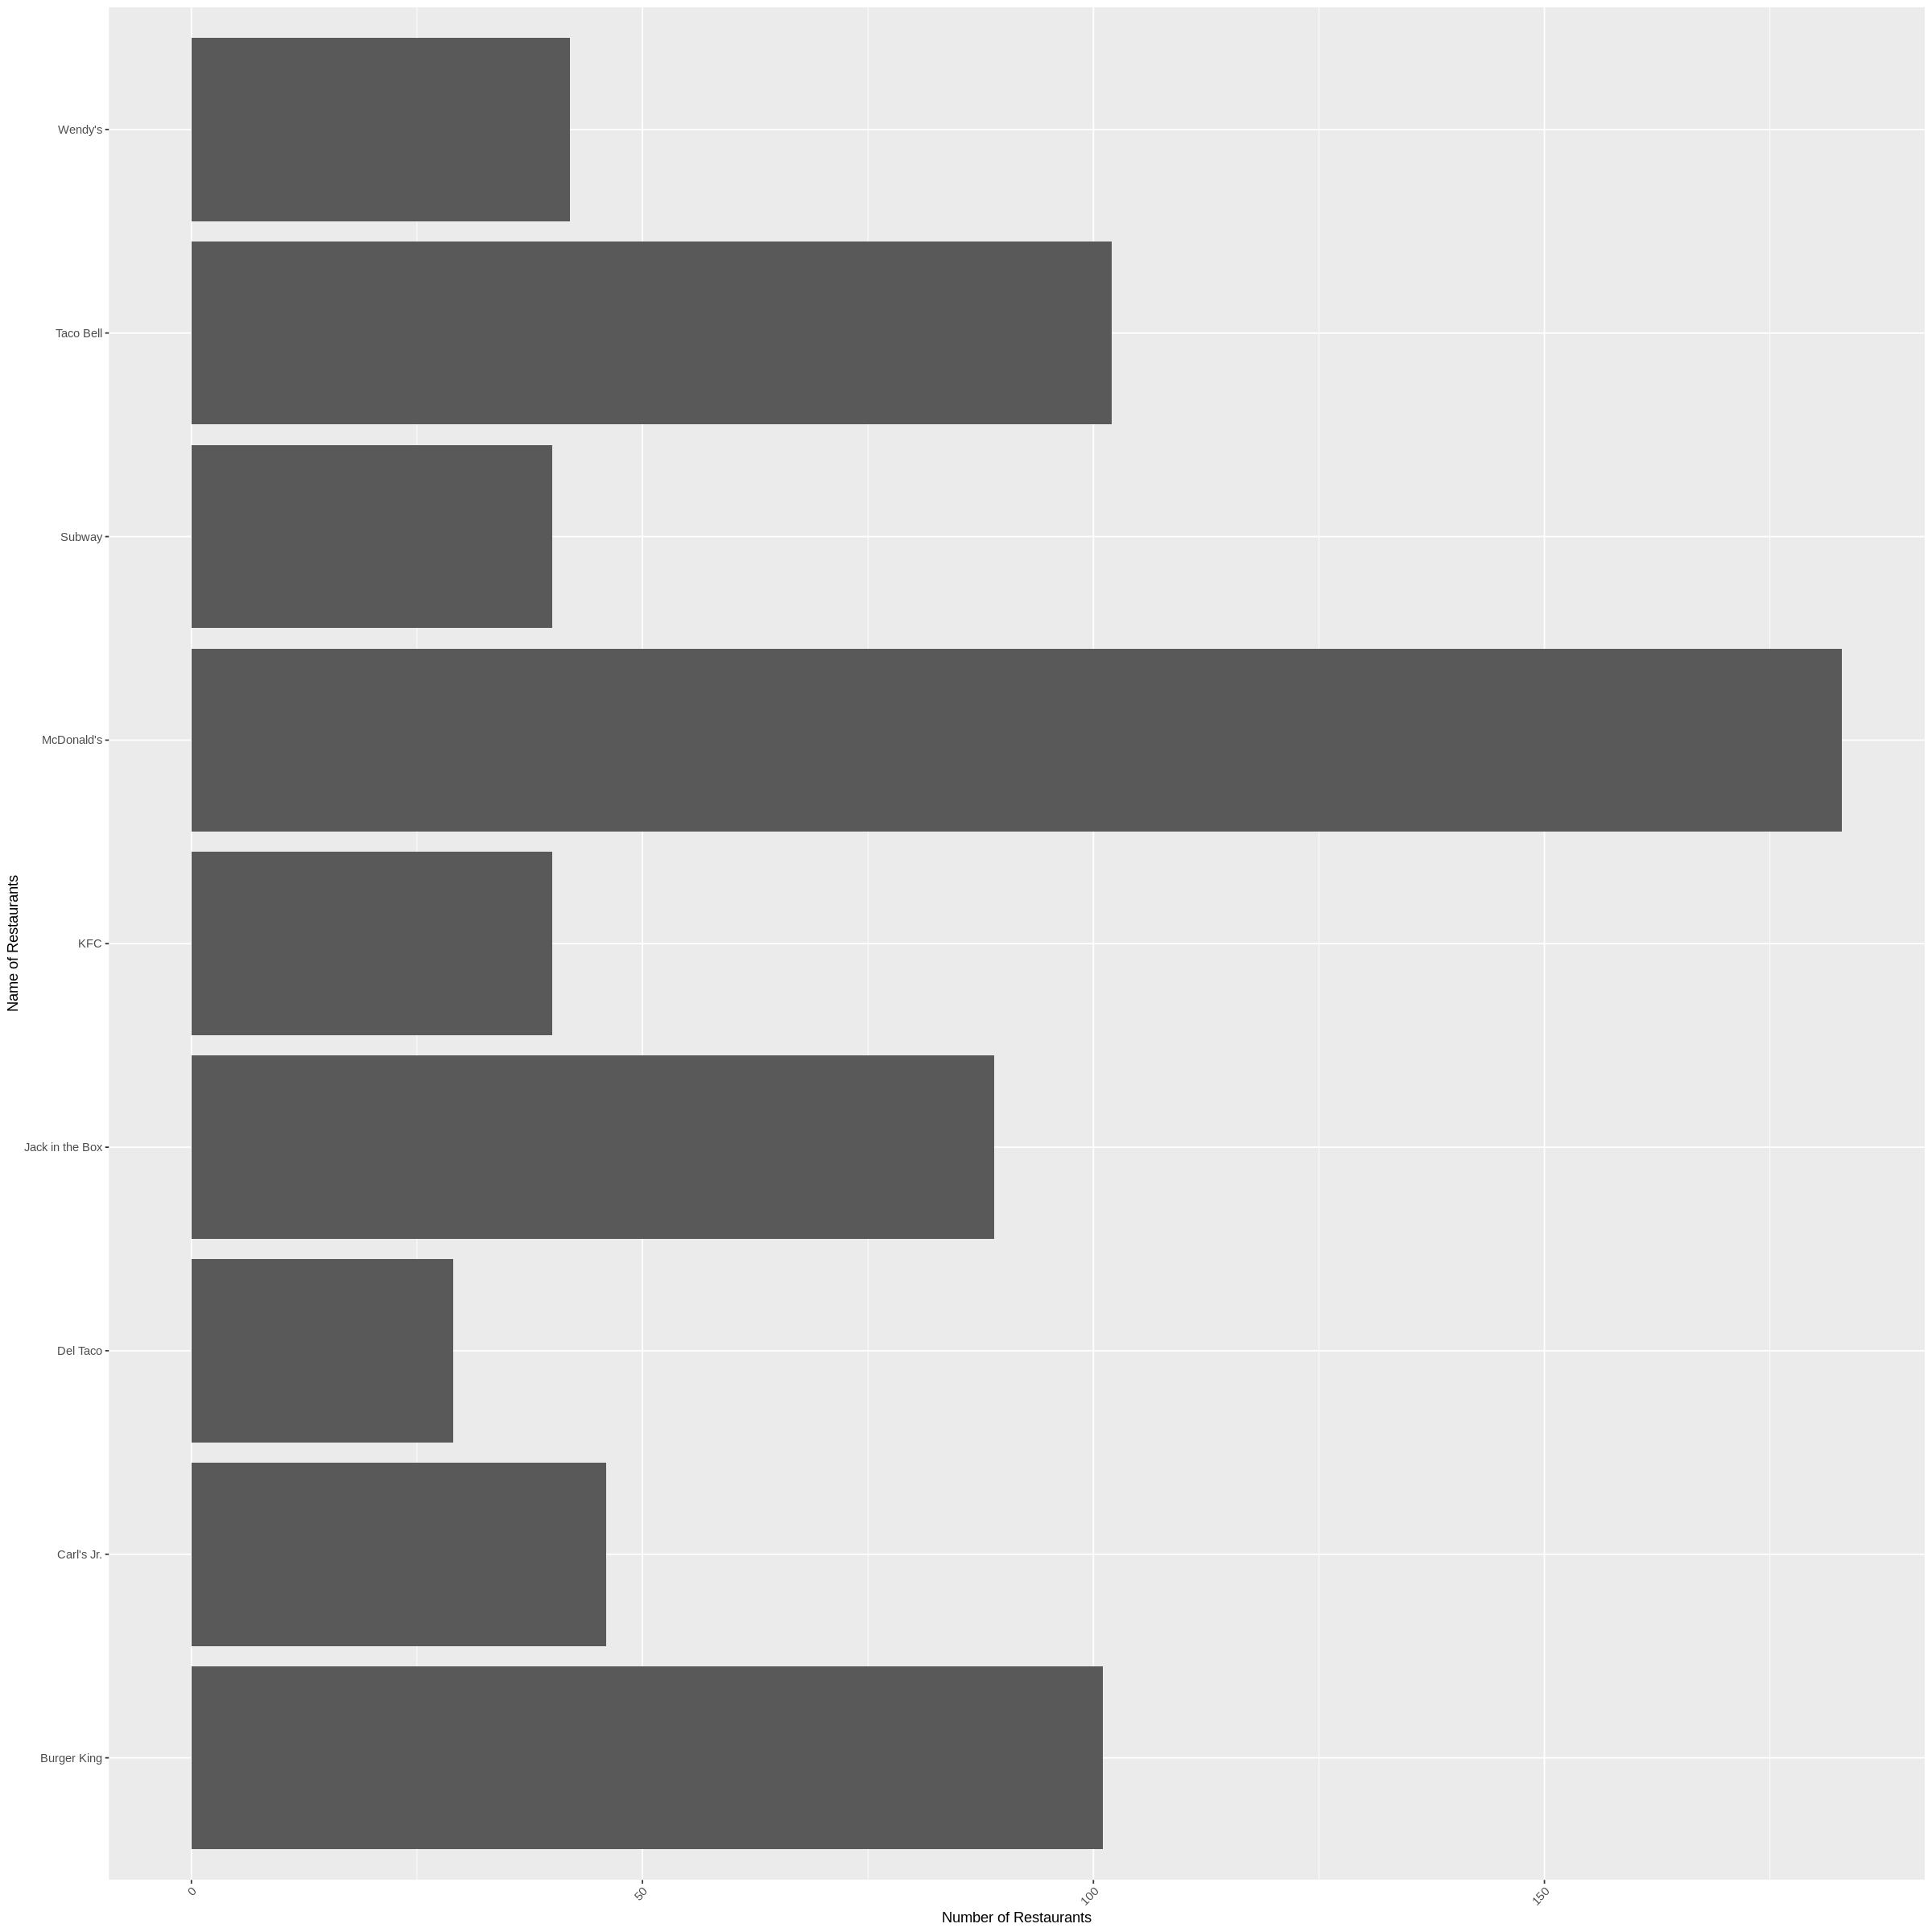

In [120]:
#PART A
count_bar_chart_A <- ggplot(top_restaurants, aes(x = name, y = count)) + 
    geom_bar(stat = "identity") +
    xlab("Name of Restaurants") +
    ylab("Number of Restaurants") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
count_bar_chart_A

#PART B
count_bar_chart_B <- count_bar_chart_A + 
    coord_flip()
count_bar_chart_B

In [121]:
test_2.5_A()
test_2.5_B()

Test passed 🌈
Test passed 😸
Test passed 🌈
Test passed 🌈
Test passed 😀
Test passed 😀
Test passed 🌈
[1] "Success!"
Test passed 🎊
Test passed 🥳
Test passed 🌈
Test passed 🥳
Test passed 🎉
Test passed 🎉
[1] "Success!"


**Question 2.6**
<br> {points: 1}

Which is the most prevalent franchise on the west coast? Save your answer as `answer2.6` and be sure to surround the restuarant name with quotations. Pay attention to case and punctuation when answering.

In [116]:
answer2.6 <- "McDonald's"

In [117]:
test_2.6()

Test passed 🎉
[1] "Success!"


**Question 2.7** 
<br> {points: 1}

Next, let's find which state on the west coast has the highest number of those top 9 fast-food restuarants we found earlier. To do this we need to use the names in `top_restaurants` to get the counts of each restaurant in each of the 3 states from the `fast_food` data frame. You will need to use `semi_join` to do this (to get the intersection of two data frames).  Name this data frame `state_counts`. Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

*If you are interested in learning more about joining data frames in R, see [this cheatsheet](https://stat545.com/bit001_dplyr-cheatsheet.html).*

In [124]:
state_counts <- fast_food |>
    semi_join(top_restaurants) |> # semi_join gives the intersection of two data frames
    filter(st %in% c("CA", "WA", "OR")) |> 
    group_by(st) |>
    summarize(count = n()) 

state_counts

Joining, by = "name"


st,count
<chr>,<int>
CA,461
OR,74
WA,137


In [125]:
test_2.7()

Test passed 🎊
Test passed 🌈
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Question 2.8**
<br> {points: 1}

Now, create a bar plot that has restaurant count on the y-axis and US state on the x-axis. Name the plot `state_counts_plot`. Remember to choose an appropriate plot size using `options`. 

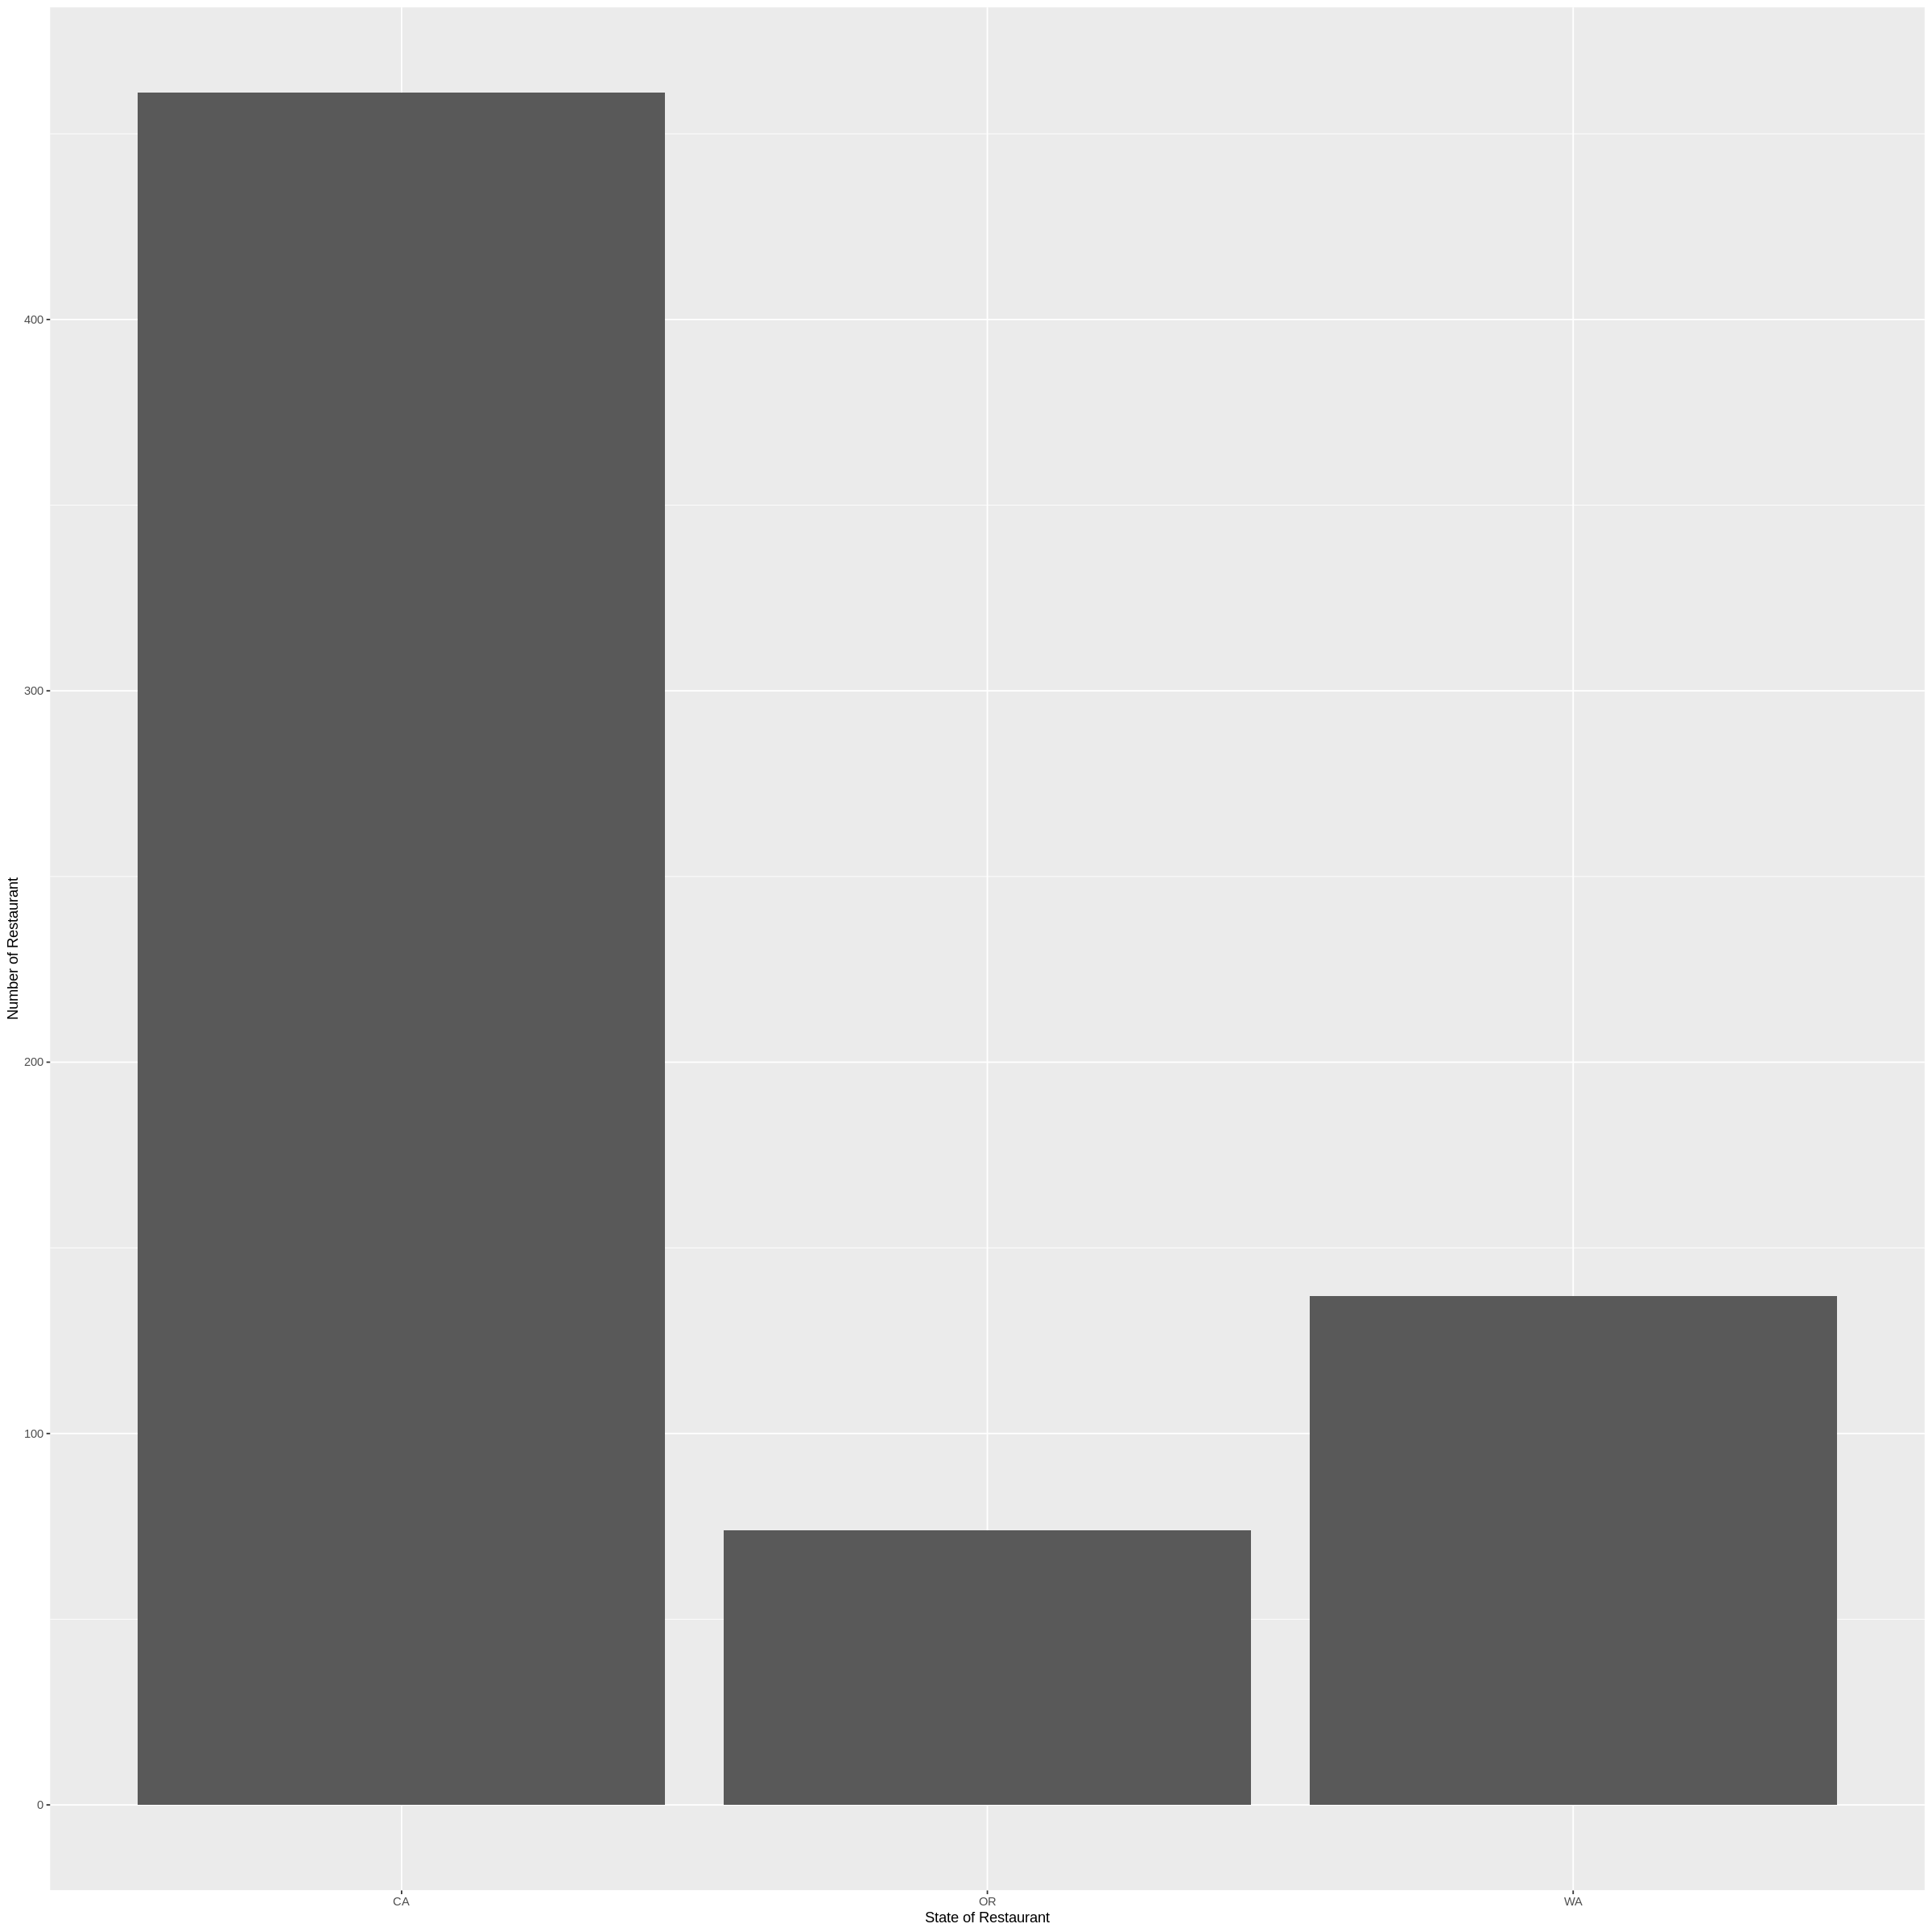

In [130]:
state_counts_plot <-  ggplot(state_counts, aes(x = st, y = count)) + 
    geom_bar(stat = "identity") +
    xlab("State of Restaurant") +
    ylab("Number of Restaurant") 


state_counts_plot

In [131]:
test_2.8()

Test passed 😸
Test passed 😀
Test passed 🥳
Test passed 😸
Test passed 🥇
Test passed 🥇
[1] "Success!"


**Question 2.9.0**
<br> {points: 1}

Which state (CA, OR, WA) has the highest number of fast-food restuarants? Save your answer as `answer2.9.0` and be sure to surround the state initialism with quotations (e.g. `"NY"`). Pay attention to case and punctuation when answering.

In [132]:
answer2.9.0 <- "CA"

In [133]:
test_2.9.0()

Test passed 😸
[1] "Success!"


Consider the populations of California (39.512 million), Oregon (4.217 million) and Washington (7.615 million) (source: [United States Census Bureau](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html), visited on April 2020). Discuss with your neighbour about whether using the raw restaurant count for each state is the best measure of competition? Would restaurant per capita be a better alternative?

Calculate the restaurant per capita for the states on the west coast by uncommenting and filling in the `...` in the code below.

In [135]:
 population <- c(39.512, 4.217, 7.615)

 state_counts |>
  mutate(n_per_capita = count / population)

st,count,n_per_capita
<chr>,<int>,<dbl>
CA,461,11.66734
OR,74,17.54802
WA,137,17.99081


**Question 2.9.1** Multiple Choice:
<br> {points: 1}

Which state has the highest number of fast food restaurants per capita?

A. Washington

B. California

C. Oregon

*Assign your answer to an object called `answer2.9.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [136]:
answer2.9.1 <- "A"

In [137]:
test_2.9.1()

Test passed 😸
[1] "Success!"


**Question 2.9.2** 
<br> {points: 1}

Is the most dominant/top franchise consistent across the west coast? To answer this question we need a data frame that has three columns: `name` (restaurant), `st` and `count` (restaurant count). We will need to use the `semi-join` strategy as we did above to use the names in `top_restaurants` to get the counts of each restaurant in each of the 3 states from the `fast_food` data frame. This time, however, we'll need to `group_by` both `name` and `st`. Name this new data frame `top_n_state`. We only want to look at those top 9 fast-food restuarants we found earlier.

In [145]:
top_n_state <- fast_food |>
    semi_join(top_restaurants) |> # semi_join gives the intersection of two data frames
    filter(st %in% c("CA", "WA", "OR")) |> 
    group_by(name, st) |>
    summarize(count = n()) 

top_n_state

Joining, by = "name"
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,st,count
<chr>,<chr>,<int>
Burger King,CA,58
Burger King,OR,14
Burger King,WA,29
⋮,⋮,⋮
Wendy's,CA,26
Wendy's,OR,6
Wendy's,WA,10


In [146]:
test_2.9.2()

Test passed 🥇
Test passed 🎉
Test passed 🥇
Test passed 🥳
[1] "Success!"


**Question 2.9.3** 
<br> {points: 1}

Plot the counts (y-axis) for the top 9 fast food restaurants on the west coast **per US State** (x-axis), as a bar chart using `geom_bar`. Use `fill = name` inside `aes` to color the restaurant's by name. Use `position = "dodge"` inside `geom_bar` to group the bars by state. To rename the legend, use a `labs` layer. This time within `labs` use the `fill` argument instead of color (this is because you need to modify the asthetic that the legend was made from, here it was fill, not color as earlier in the worksheet).

To do this fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`. Make sure to label your axes and choose an appropriate plot size. 

*Assign your answer to an object called `top_n_state_plot`.*

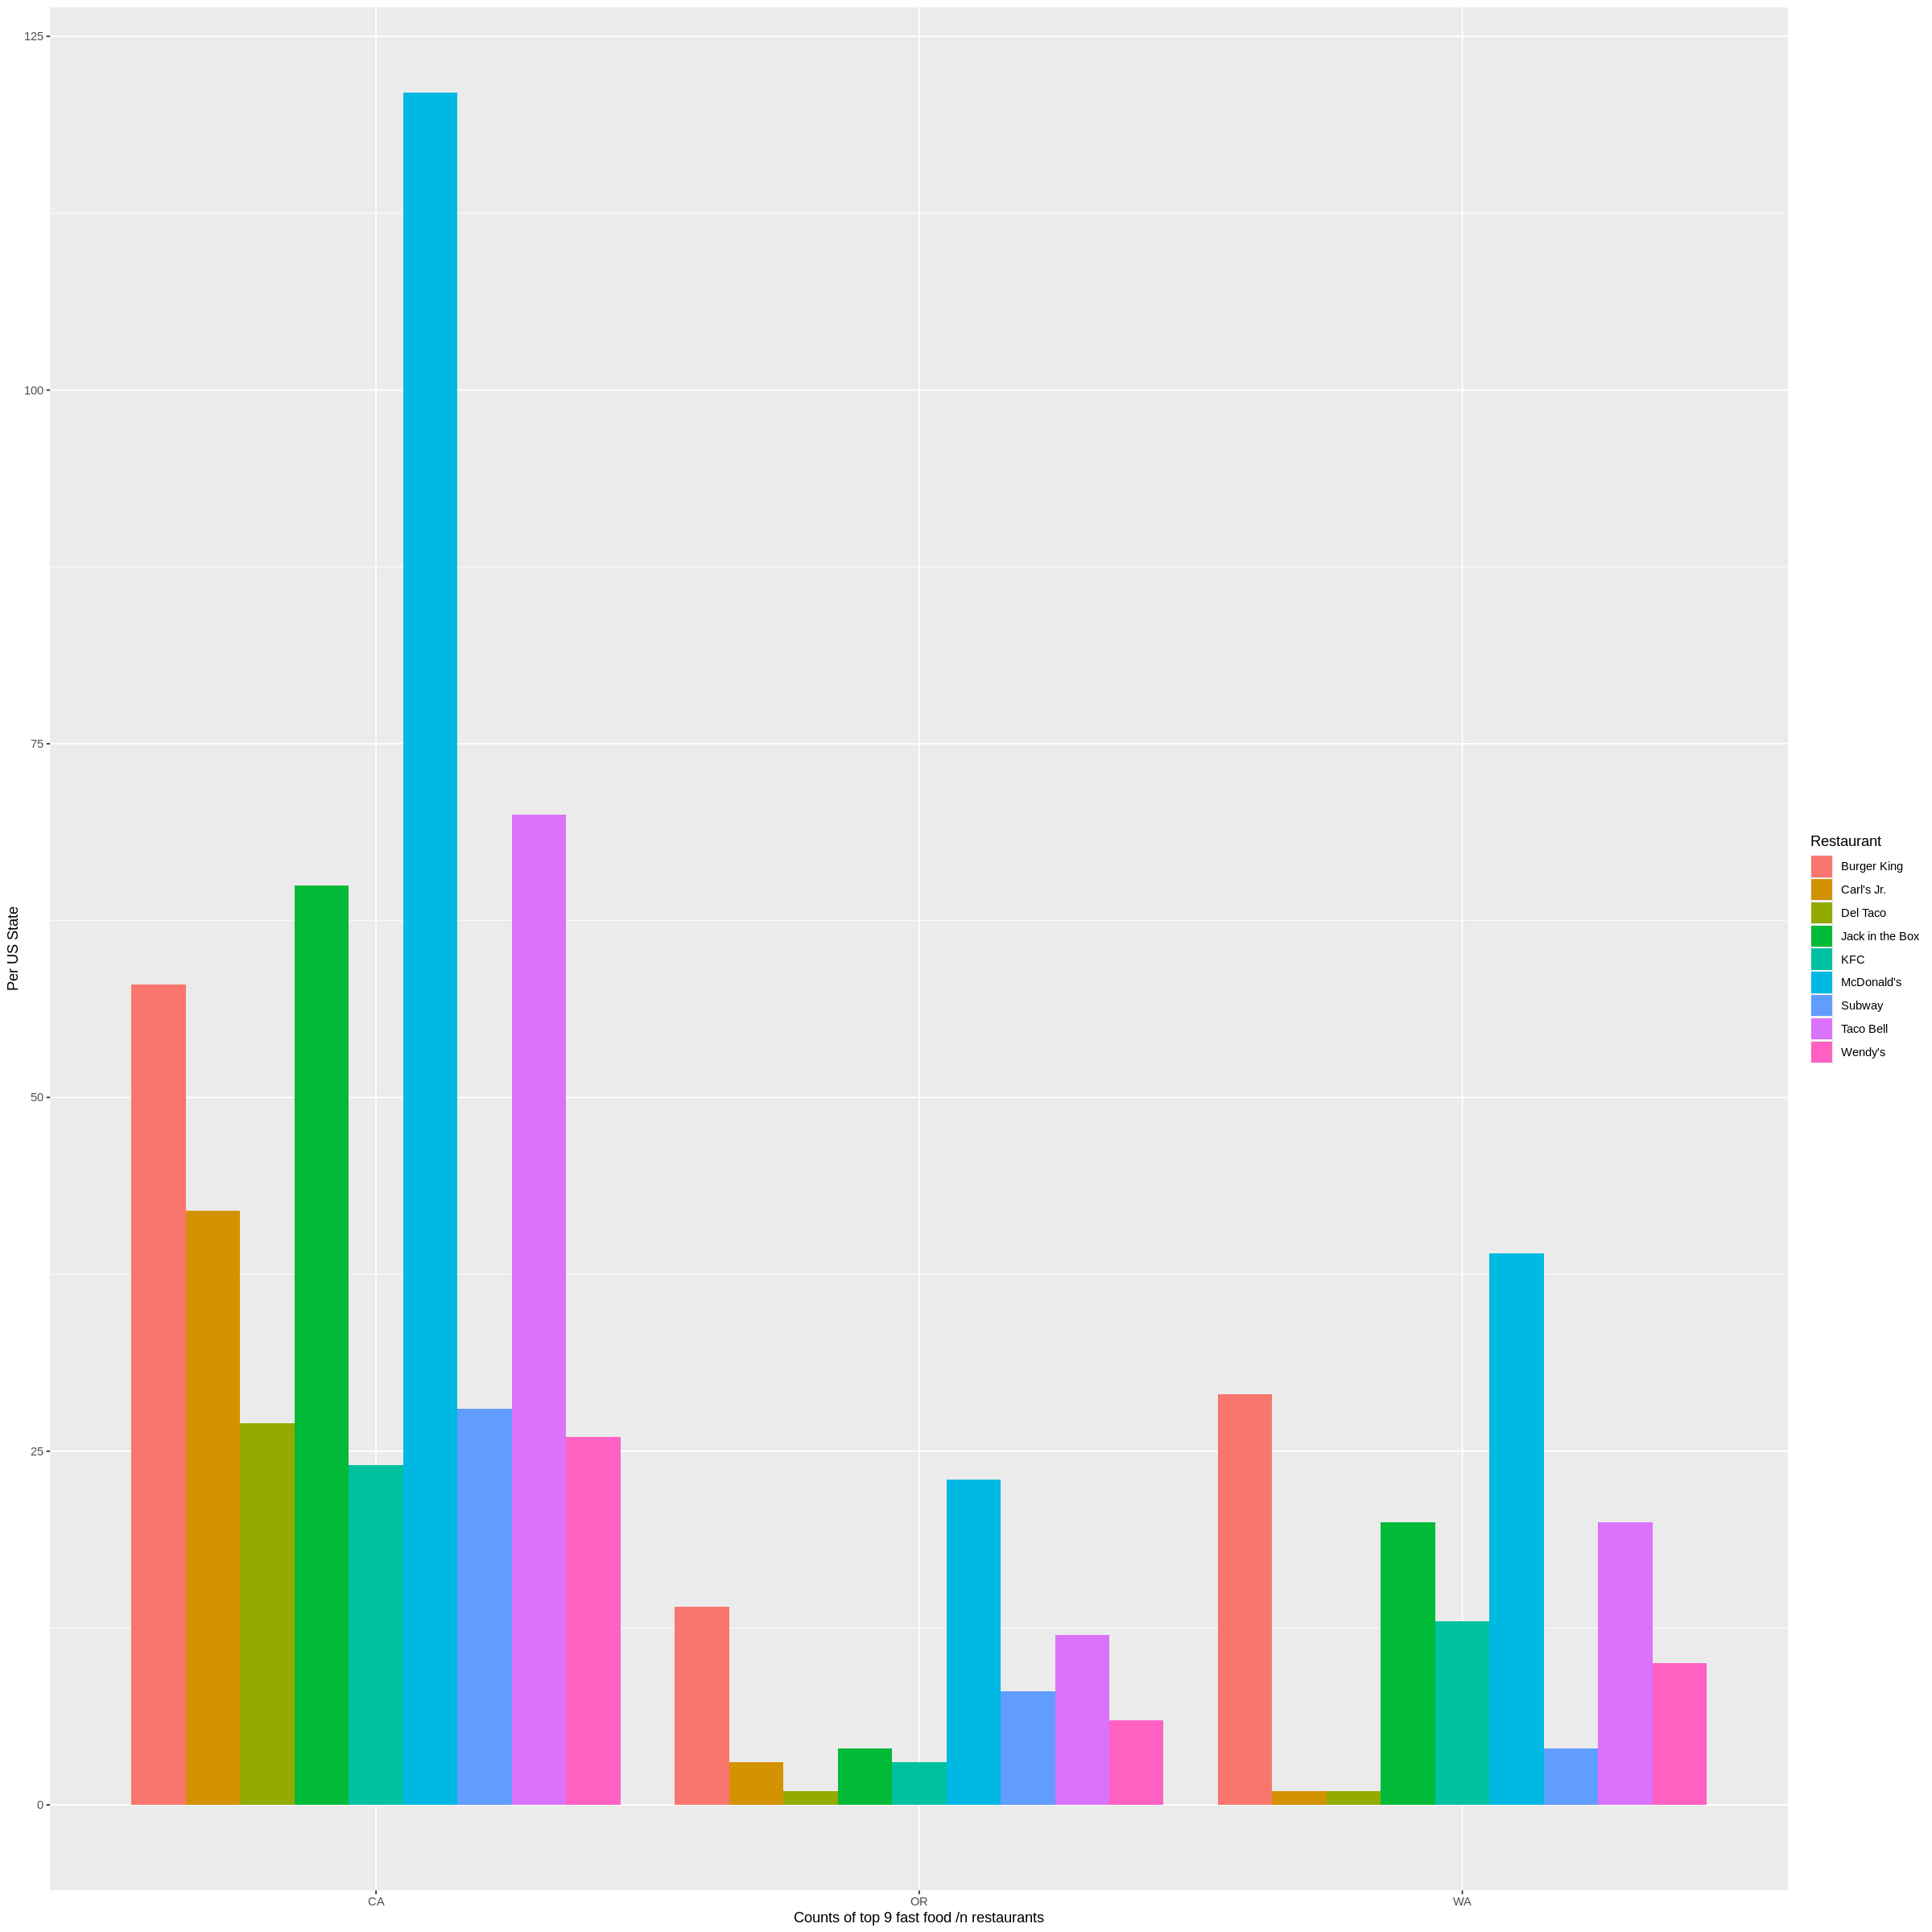

In [148]:
top_n_state_plot <- ggplot(top_n_state, aes(x = st, y = count, fill = name)) + 
    geom_bar(stat = "identity", position = "dodge") + 
   xlab("Counts of top 9 fast food /n restaurants") +
   ylab("Per US State") +
   labs(fill = "Restaurant") 


top_n_state_plot

In [149]:
test_2.9.3()

Test passed 🎉
Test passed 🌈
Test passed 🥇
Test passed 😀
Test passed 🎊
Test passed 🥳
Test passed 🎊
[1] "Success!"


How easy is that to compare the restaurants and states to answer our question: Is the most dominant/top franchise consistent across the West-Coast? If we carefully look at this plot we can pick answer this question, but it takes us a while to process this. If we instead visualize this as a stacked bar chart using proportions instead of counts we might be able to do this easier (making it a more effective visualization).

**Question 2.9.4** 
<br> {points: 1}

Copy your code from Question 2.9.3 and modify `position = "dodge"` to `position = "fill"` to change from doing a grouped bar chart to a stacked bar chart with the data represented as proportions instead of counts. 

*Assign your answer to an object called `top_n_state_plot`*.

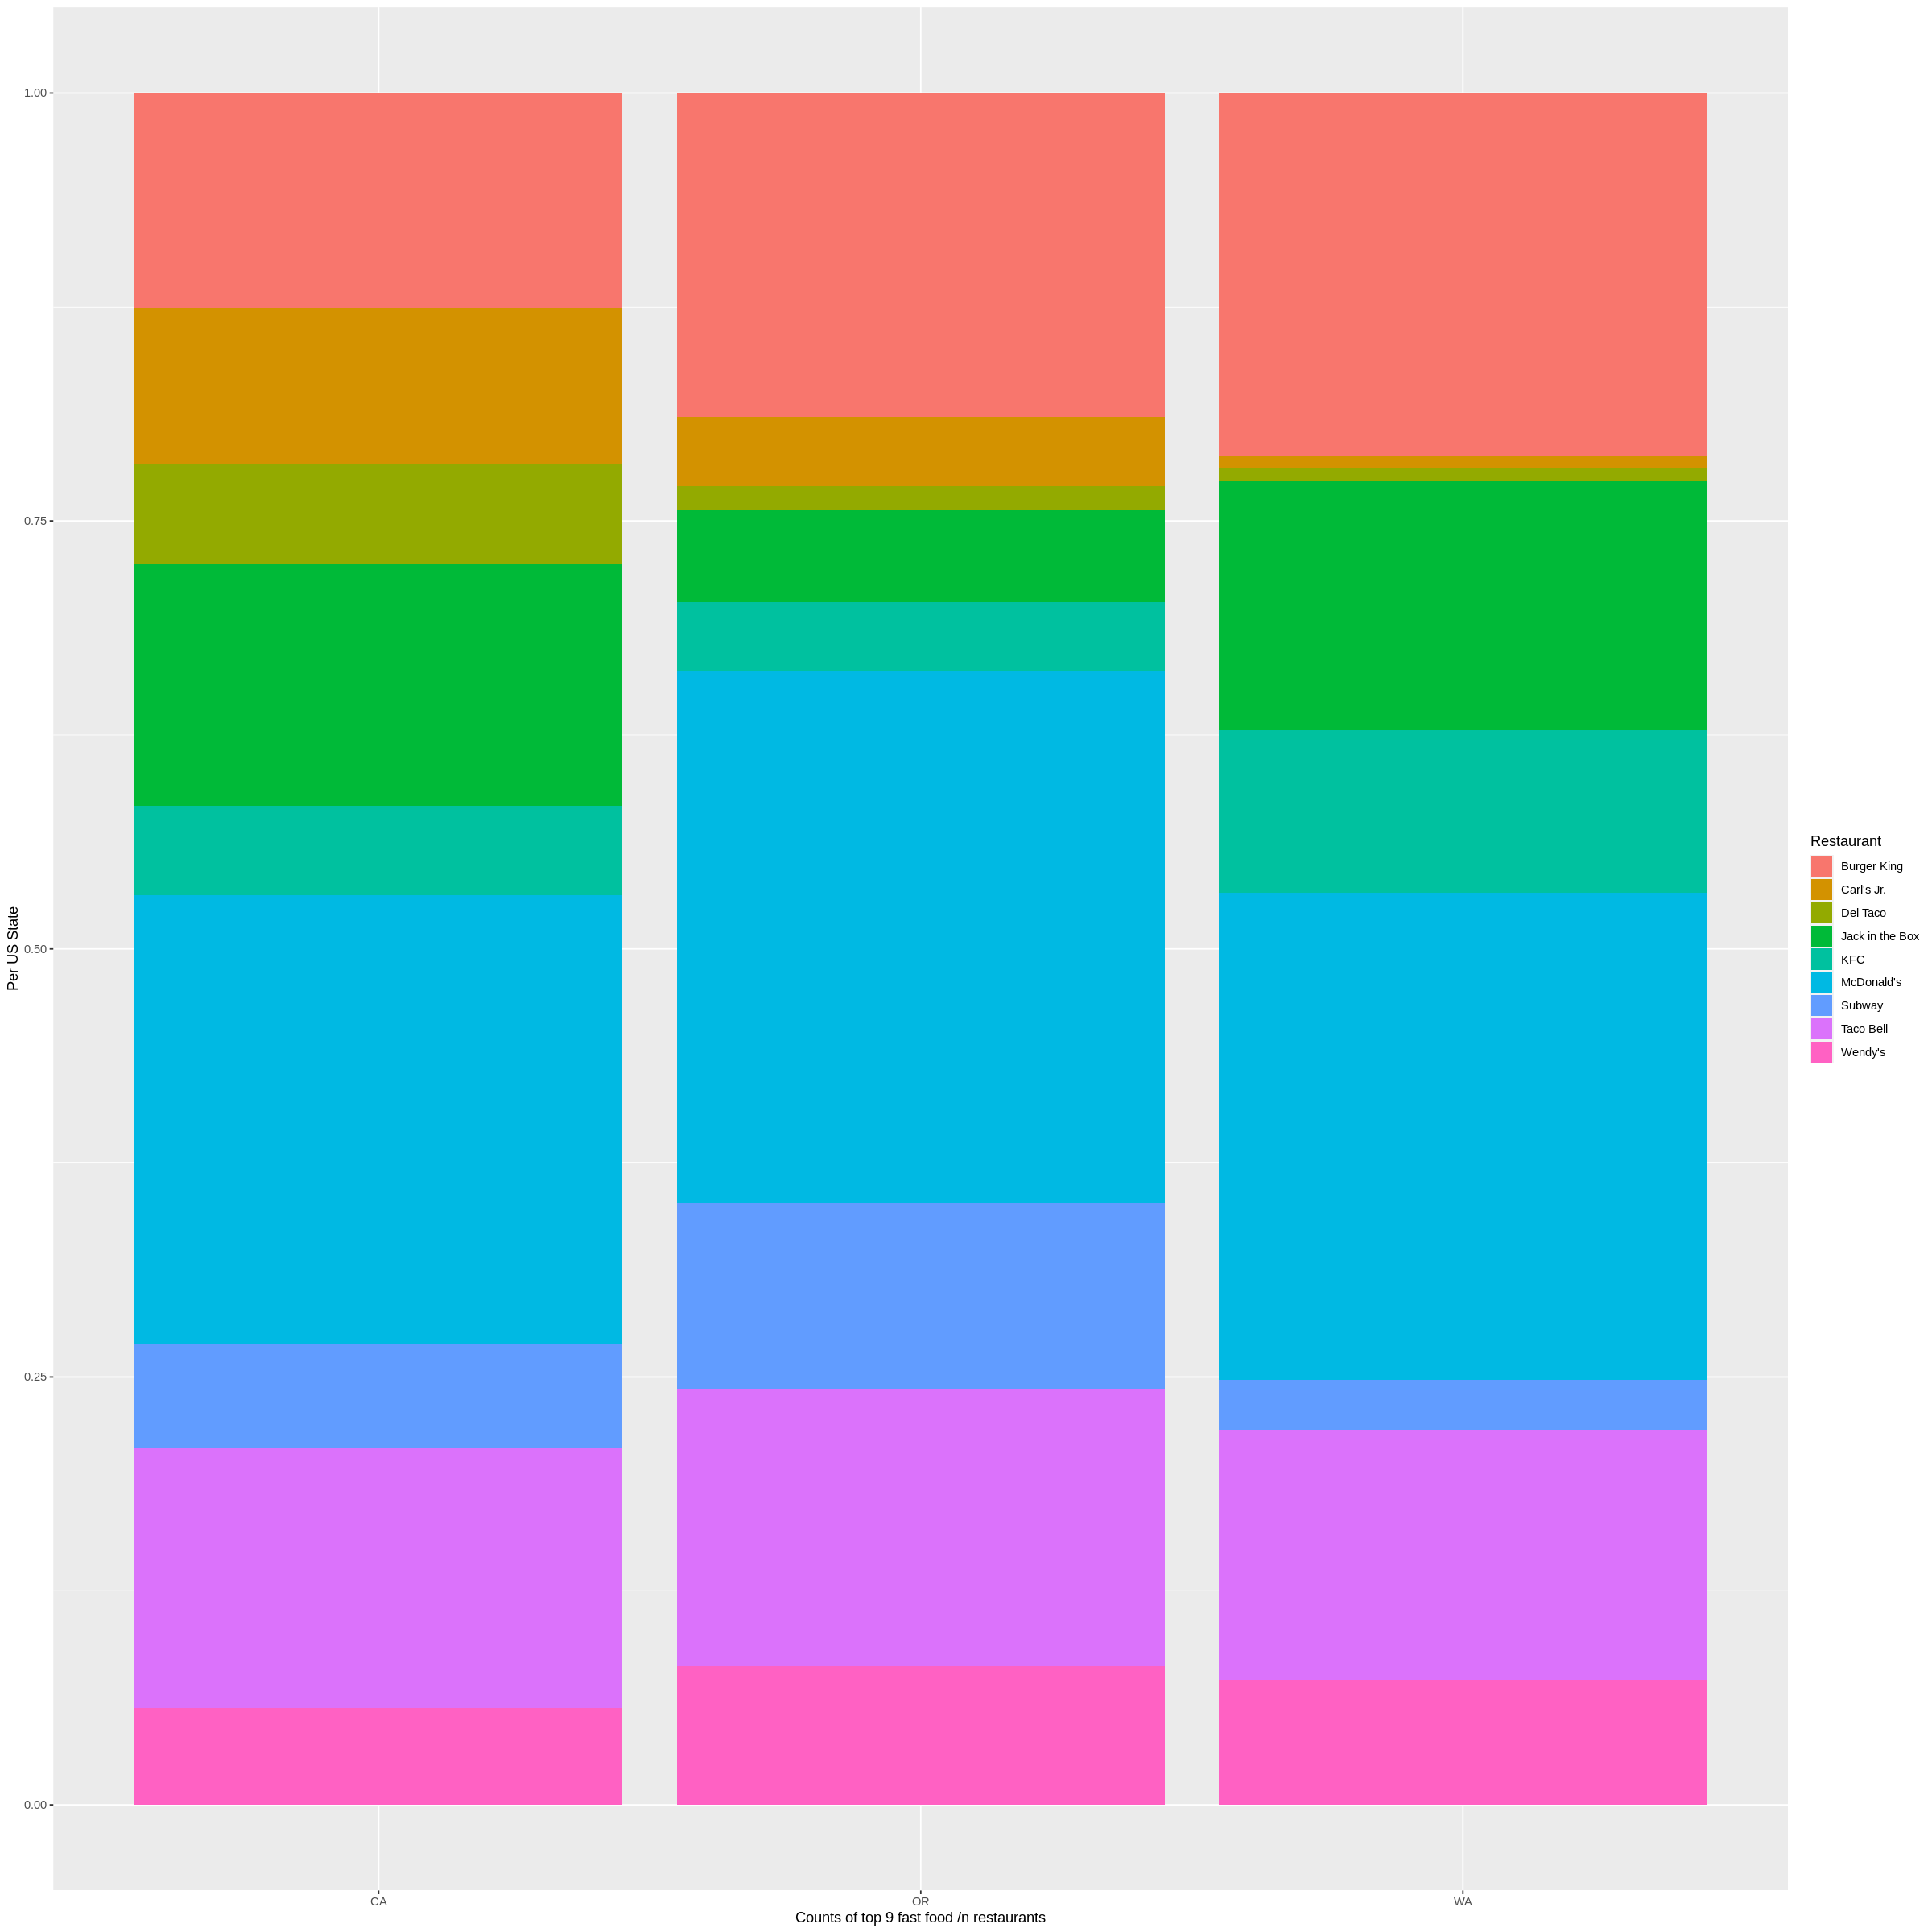

In [150]:
top_n_state_plot <- ggplot(top_n_state, aes(x = st, y = count, fill = name)) + 
    geom_bar(stat = "identity", position = "fill") + 
   xlab("Counts of top 9 fast food /n restaurants") +
   ylab("Per US State") +
   labs(fill = "Restaurant") 


top_n_state_plot

In [151]:
test_2.9.4()

Test passed 🥳
Test passed 🎊
Test passed 🥳
Test passed 🎊
Test passed 🎊
Test passed 🥳
Test passed 🌈
[1] "Success!"


**Question 2.9.5** 
<br> {points: 1}

Is the most dominant franchise consistent across the west coast? Answer `"yes"` or `"no"`. Save your answer as `answer2.9.5` and be sure to surround the answer with quotations. Pay attention to case and punctuation when answering.

In [154]:
answer2.9.5 <- "yes"

In [155]:
test_2.9.5()

Test passed 😸
[1] "Success!"


We are just scratching the surface of how to create effective visualizations in R. For example, we haven't covered how to change from the default colors palette `ggplot2` provides. We'll learn more in the tutorial, but it's a big world out there; to learn more, visit the links in the reading and practice, practice, practice! Go forth and make beautiful and effective plots!

In [156]:
source("cleanup.R")